# IMPORTAÇÃO DA BASE DE DADOS E DOS PACOTES 

In [1]:
#Importação de pacotes
import warnings
import pandas as pd
df_traduzida = pd.read_csv('clientes.csv',thousands= " ")
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import joblib # Utilizado para salvar o modelo preditivo
from sklearn.preprocessing import LabelEncoder #Utilizada para fazer o OneHotEncoding
from sklearn.metrics import mean_squared_error,precision_score, recall_score, f1_score, accuracy_score, roc_auc_score, confusion_matrix

from sklearn.preprocessing import MinMaxScaler #Utilizada para fazer a padronização dos dados
from sklearn.metrics import r2_score # Utilizado para medir a acuracia do modelo preditivo
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV 
import time
warnings.filterwarnings("ignore") 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
#pd.options.display.float_format = '{:.2f}'.format

In [2]:
df_traduzida.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 25 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id_cliente                100000 non-null  int64  
 1   mes                       100000 non-null  int64  
 2   idade                     100000 non-null  float64
 3   profissao                 100000 non-null  object 
 4   salario_anual             100000 non-null  float64
 5   num_contas                100000 non-null  float64
 6   num_cartoes               100000 non-null  float64
 7   juros_emprestimo          100000 non-null  float64
 8   num_emprestimos           100000 non-null  float64
 9   dias_atraso               100000 non-null  float64
 10  num_pagamentos_atrasados  100000 non-null  float64
 11  num_verificacoes_credito  100000 non-null  float64
 12  mix_credito               100000 non-null  object 
 13  divida_total              100000 non-null  fl

In [3]:
df_traduzida.head()

,id_cliente,mes,idade,profissao,salario_anual,num_contas,num_cartoes,juros_emprestimo,num_emprestimos,dias_atraso,num_pagamentos_atrasados,num_verificacoes_credito,mix_credito,divida_total,taxa_uso_credito,idade_historico_credito,investimento_mensal,comportamento_pagamento,saldo_final_mes,score_credito,emprestimo_carro,emprestimo_casa,emprestimo_pessoal,emprestimo_credito,emprestimo_estudantil
0,3392,1,23.0,cientista,19114.12,3.0,4.0,3.0,4.0,3.0,7.0,4.0,Bom,809.98,26.822620,265.0,21.46538,alto_gasto_pagamento_baixos,312.494089,Good,1,1,1,1,0
1,3392,2,23.0,cientista,19114.12,3.0,4.0,3.0,4.0,3.0,4.0,4.0,Bom,809.98,31.944960,266.0,21.46538,baixo_gasto_pagamento_alto,284.629162,Good,1,1,1,1,0
2,3392,3,23.0,cientista,19114.12,3.0,4.0,3.0,4.0,3.0,7.0,4.0,Bom,809.98,28.609352,267.0,21.46538,baixo_gasto_pagamento_medio,331.209863,Good,1,1,1,1,0
3,3392,4,23.0,cientista,19114.12,3.0,4.0,3.0,4.0,5.0,4.0,4.0,Bom,809.98,31.377862,268.0,21.46538,baixo_gasto_pagamento_baixo,223.451310,Good,1,1,1,1,0
4,3392,5,23.0,cientista,19114.12,3.0,4.0,3.0,4.0,6.0,4.0,4.0,Bom,809.98,24.797347,269.0,21.46538,alto_gasto_pagamento_medio,341.489231,Good,1,1,1,1,0


In [4]:
(df_traduzida.isnull().sum() / len(df_traduzida['mes']))*100

id_cliente                  0.0
mes                         0.0
idade                       0.0
profissao                   0.0
salario_anual               0.0
num_contas                  0.0
num_cartoes                 0.0
juros_emprestimo            0.0
num_emprestimos             0.0
dias_atraso                 0.0
num_pagamentos_atrasados    0.0
num_verificacoes_credito    0.0
mix_credito                 0.0
divida_total                0.0
taxa_uso_credito            0.0
idade_historico_credito     0.0
investimento_mensal         0.0
comportamento_pagamento     0.0
saldo_final_mes             0.0
score_credito               0.0
emprestimo_carro            0.0
emprestimo_casa             0.0
emprestimo_pessoal          0.0
emprestimo_credito          0.0
emprestimo_estudantil       0.0
dtype: float64

In [5]:
df_traduzida.duplicated().sum()

0

In [6]:
del df_traduzida['id_cliente']

####  COMO NÃO HÁ NECESSIDADE DE TRATEMEENTO DOS DADOS IREMOS IR PRA ANÁLISE

# ANÁLISE EXPLORATÓRIA 

### ESTATÍSTICA

In [7]:
df_traduzida.describe()

,mes,idade,salario_anual,num_contas,num_cartoes,juros_emprestimo,num_emprestimos,dias_atraso,num_pagamentos_atrasados,num_verificacoes_credito,divida_total,taxa_uso_credito,idade_historico_credito,investimento_mensal,saldo_final_mes,emprestimo_carro,emprestimo_casa,emprestimo_pessoal,emprestimo_credito,emprestimo_estudantil
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.00000
mean,4.500000,33.316340,50505.123449,5.368820,5.533570,14.53208,3.532880,21.08141,13.313120,5.798250,1426.220376,32.285173,221.220460,55.101315,392.697586,0.305600,0.511760,0.311040,0.31728,0.31040
std,2.291299,10.764812,38299.422093,2.593314,2.067098,8.74133,2.446356,14.80456,6.237166,3.867826,1155.129026,5.116875,99.680716,39.006932,201.652719,0.460663,0.499864,0.462921,0.46542,0.46266
min,1.000000,14.000000,7005.930000,0.000000,0.000000,1.00000,0.000000,0.00000,0.000000,0.000000,0.230000,20.000000,1.000000,0.000000,0.007760,0.000000,0.000000,0.000000,0.00000,0.00000
25%,2.750000,24.000000,19342.972500,3.000000,4.000000,7.00000,2.000000,10.00000,9.000000,3.000000,566.072500,28.052567,144.000000,27.959111,267.615983,0.000000,0.000000,0.000000,0.00000,0.00000
50%,4.500000,33.000000,36999.705000,5.000000,5.000000,13.00000,3.000000,18.00000,14.000000,5.000000,1166.155000,32.305784,219.000000,45.156550,333.865366,0.000000,1.000000,0.000000,0.00000,0.00000
75%,6.250000,42.000000,71683.470000,7.000000,7.000000,20.00000,5.000000,28.00000,18.000000,8.000000,1945.962500,36.496663,302.000000,71.295797,463.215683,1.000000,1.000000,1.000000,1.00000,1.00000
max,8.000000,56.000000,179987.280000,11.000000,11.000000,34.00000,9.000000,62.00000,25.000000,17.000000,4998.070000,50.000000,404.000000,434.191089,1183.930696,1.000000,1.000000,1.000000,1.00000,1.00000


### MODA

In [8]:
from statistics import mode

mode(df_traduzida['mes'])

1

In [9]:
mode(df_traduzida['idade'])

38.0

In [10]:
mode(df_traduzida['salario_anual'])

9141.63

In [11]:
mode(df_traduzida['num_contas'])

6.0

In [12]:
mode(df_traduzida['num_cartoes'])

5.0

In [13]:
mode(df_traduzida['juros_emprestimo'])

8.0

In [14]:
mode(df_traduzida['num_emprestimos'])

3.0

In [15]:
mode(df_traduzida['dias_atraso'])

15.0

In [16]:
mode(df_traduzida['num_pagamentos_atrasados'])

19.0

In [17]:
mode(df_traduzida['num_verificacoes_credito'])

4.0

In [18]:
mode(df_traduzida['divida_total'])

1151.7

In [19]:
mode(df_traduzida['taxa_uso_credito'])

26.822619623699016

In [20]:
mode(df_traduzida['idade_historico_credito'])

190.0

In [21]:
mode(df_traduzida['investimento_mensal'])

0.0

In [22]:
mode(df_traduzida['saldo_final_mes'])

1183.9306960885192

In [23]:
mode(df_traduzida['emprestimo_carro'])

0

In [24]:
mode(df_traduzida['emprestimo_pessoal'])

0

In [25]:
mode(df_traduzida['emprestimo_credito'])

0

In [26]:
mode(df_traduzida['emprestimo_estudantil'])

0

### ASSIMETRIA

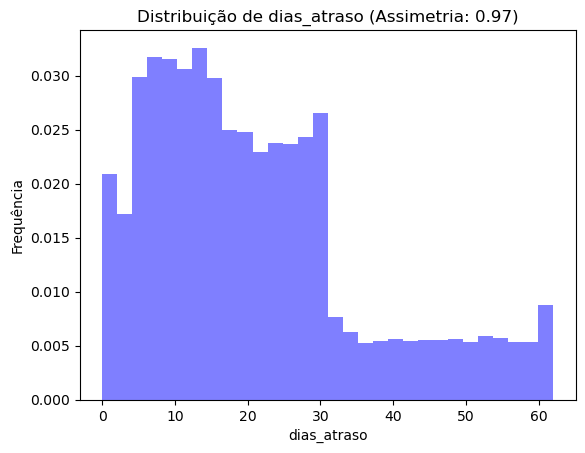

In [27]:
import matplotlib.pyplot as plt
from scipy.stats import skew

# Supondo que 'df_traduzida' seja o nome do DataFrame e 'dias_atraso' seja a coluna de interesse

# Acessando a coluna 'dias_atraso' do DataFrame
dias_atraso = df_traduzida['dias_atraso']

# Calculando a assimetria dos dados
assimetria = skew(dias_atraso)

# Criando um histograma para visualizar a distribuição dos dados
plt.hist(dias_atraso, bins=30, density=True, alpha=0.5, color='b')

# Adicionando informações ao gráfico
plt.title(f'Distribuição de dias_atraso (Assimetria: {assimetria:.2f})')
plt.xlabel('dias_atraso')
plt.ylabel('Frequência')

# Exibindo o gráfico
plt.show()


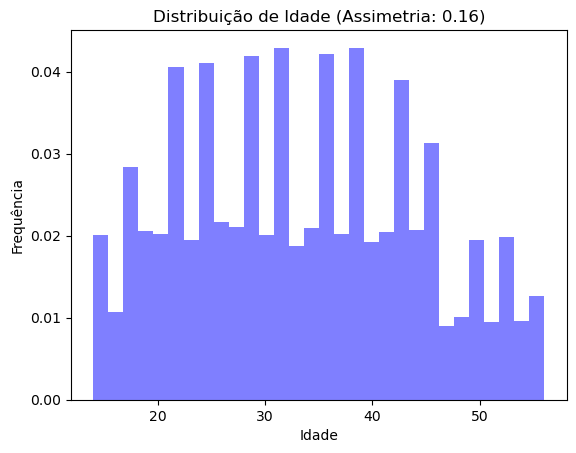

In [28]:
import matplotlib.pyplot as plt
from scipy.stats import skew

# Supondo que 'df_traduzida' seja o nome do DataFrame e 'dias_atraso' seja a coluna de interesse

# Acessando a coluna 'dias_atraso' do DataFrame
idade = df_traduzida['idade']

# Calculando a assimetria dos dados
assimetria = skew(idade)

# Criando um histograma para visualizar a distribuição dos dados
plt.hist(idade, bins=30, density=True, alpha=0.5, color='b')

# Adicionando informações ao gráfico
plt.title(f'Distribuição de Idade (Assimetria: {assimetria:.2f})')
plt.xlabel('Idade')
plt.ylabel('Frequência')

# Exibindo o gráfico
plt.show()


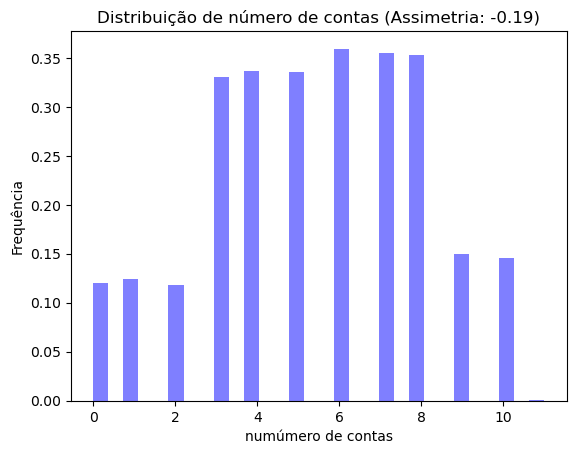

In [29]:
num_contas = df_traduzida['num_contas']


assimetria = skew(num_contas)


plt.hist(num_contas, bins=30, density=True, alpha=0.5, color='b')


plt.title(f'Distribuição de número de contas (Assimetria: {assimetria:.2f})')
plt.xlabel('numúmero de contas')
plt.ylabel('Frequência')


plt.show()


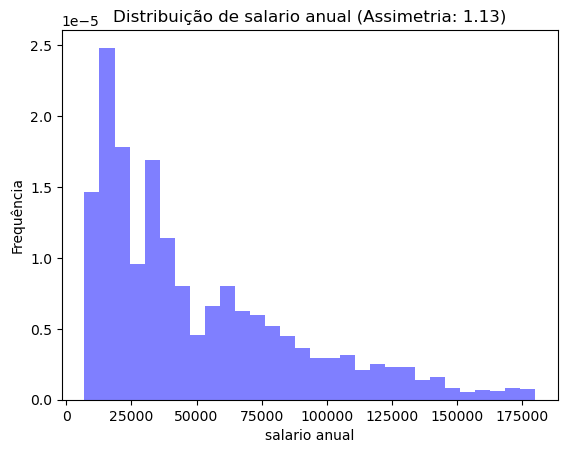

In [30]:
salario_anual = df_traduzida['salario_anual']


assimetria = skew(salario_anual)


plt.hist(salario_anual, bins=30, density=True, alpha=0.5, color='b')


plt.title(f'Distribuição de salario anual (Assimetria: {assimetria:.2f})')
plt.xlabel('salario anual')
plt.ylabel('Frequência')


plt.show()


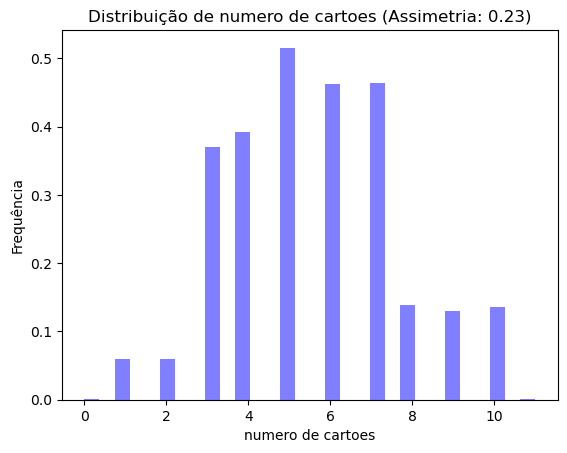

In [31]:
num_cartoes = df_traduzida['num_cartoes']


assimetria = skew(num_cartoes)


plt.hist(num_cartoes, bins=30, density=True, alpha=0.5, color='b')


plt.title(f'Distribuição de numero de cartoes (Assimetria: {assimetria:.2f})')
plt.xlabel('numero de cartoes')
plt.ylabel('Frequência')


plt.show()

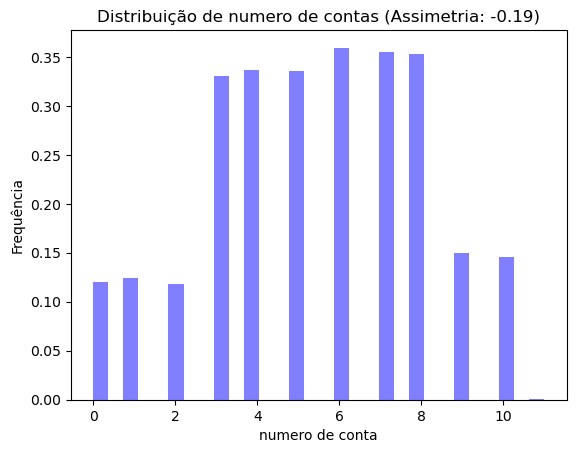

In [32]:
num_contas = df_traduzida['num_contas']


assimetria = skew(num_contas)


plt.hist(num_contas, bins=30, density=True, alpha=0.5, color='b')


plt.title(f'Distribuição de numero de contas (Assimetria: {assimetria:.2f})')
plt.xlabel('numero de conta')
plt.ylabel('Frequência')


plt.show()

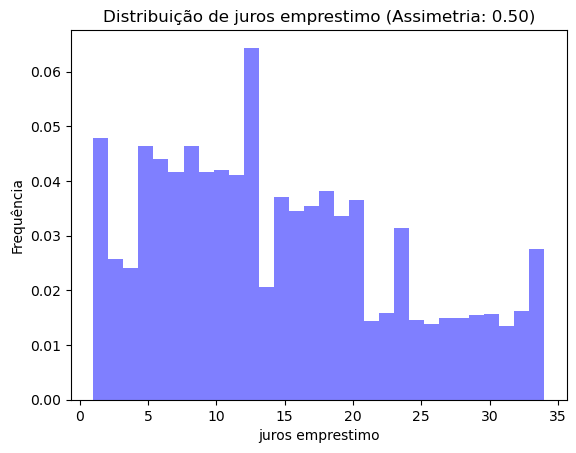

In [33]:
juros_emprestimo = df_traduzida['juros_emprestimo']


assimetria = skew(juros_emprestimo)


plt.hist(juros_emprestimo, bins=30, density=True, alpha=0.5, color='b')


plt.title(f'Distribuição de juros emprestimo (Assimetria: {assimetria:.2f})')
plt.xlabel('juros emprestimo')
plt.ylabel('Frequência')


plt.show()

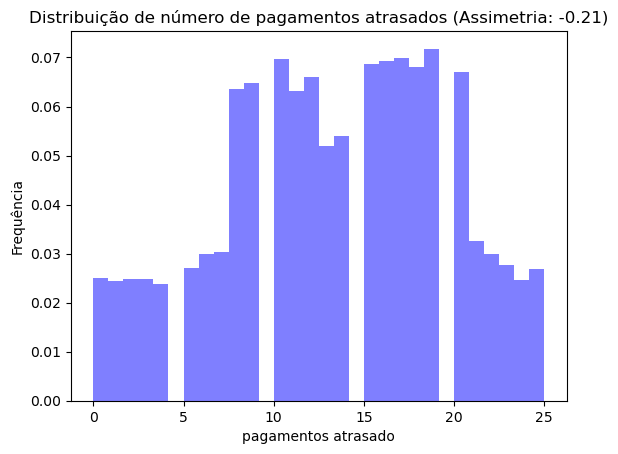

In [34]:
num_pagamentos_atrasados = df_traduzida['num_pagamentos_atrasados']


assimetria = skew(num_pagamentos_atrasados)


plt.hist(num_pagamentos_atrasados, bins=30, density=True, alpha=0.5, color='b')


plt.title(f'Distribuição de número de pagamentos atrasados (Assimetria: {assimetria:.2f})')
plt.xlabel('pagamentos atrasado')
plt.ylabel('Frequência')


plt.show()

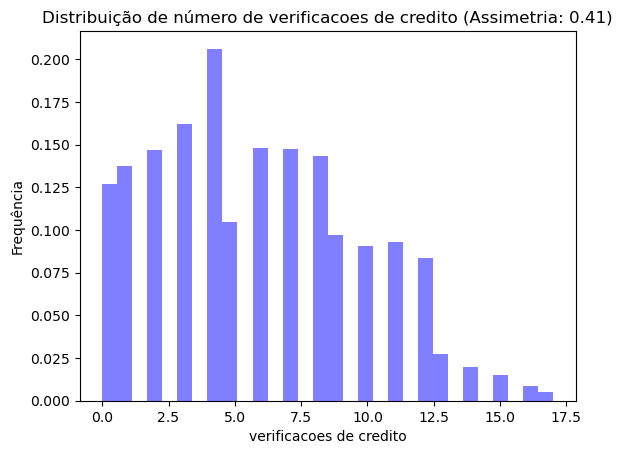

In [35]:
num_verificacoes_credito = df_traduzida['num_verificacoes_credito']


assimetria = skew(num_verificacoes_credito)


plt.hist(num_verificacoes_credito, bins=30, density=True, alpha=0.5, color='b')


plt.title(f'Distribuição de número de verificacoes de credito (Assimetria: {assimetria:.2f})')
plt.xlabel('verificacoes de credito')
plt.ylabel('Frequência')


plt.show() 

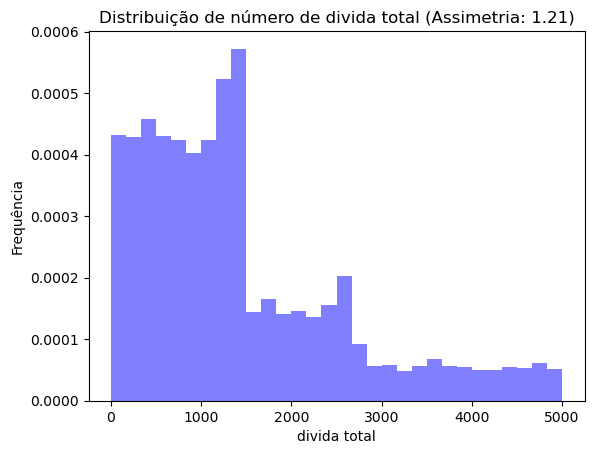

In [36]:
divida_total = df_traduzida['divida_total']


assimetria = skew(divida_total)


plt.hist(divida_total, bins=30, density=True, alpha=0.5, color='b')


plt.title(f'Distribuição de número de divida total (Assimetria: {assimetria:.2f})')
plt.xlabel('divida total')
plt.ylabel('Frequência')


plt.show() 

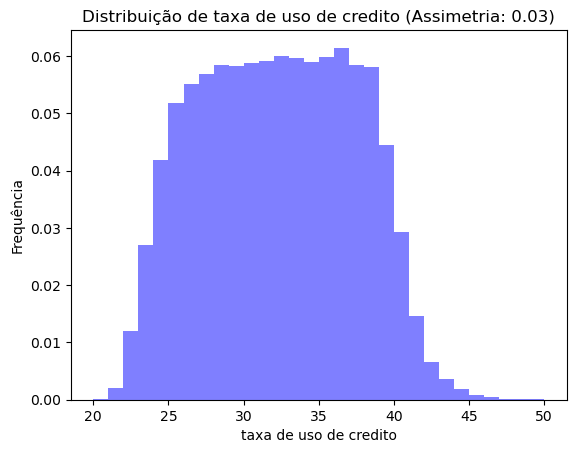

In [37]:
taxa_uso_credito = df_traduzida['taxa_uso_credito']


assimetria = skew(taxa_uso_credito)


plt.hist(taxa_uso_credito, bins=30, density=True, alpha=0.5, color='b')


plt.title(f'Distribuição de taxa de uso de credito (Assimetria: {assimetria:.2f})')
plt.xlabel('taxa de uso de credito')
plt.ylabel('Frequência')


plt.show() 

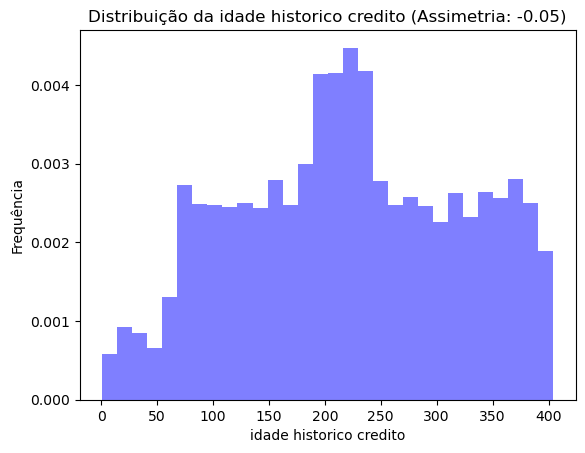

In [38]:
idade_historico_credito = df_traduzida['idade_historico_credito']


assimetria = skew(idade_historico_credito)


plt.hist(idade_historico_credito, bins=30, density=True, alpha=0.5, color='b')


plt.title(f'Distribuição da idade historico credito (Assimetria: {assimetria:.2f})')
plt.xlabel('idade historico credito')
plt.ylabel('Frequência')


plt.show() 

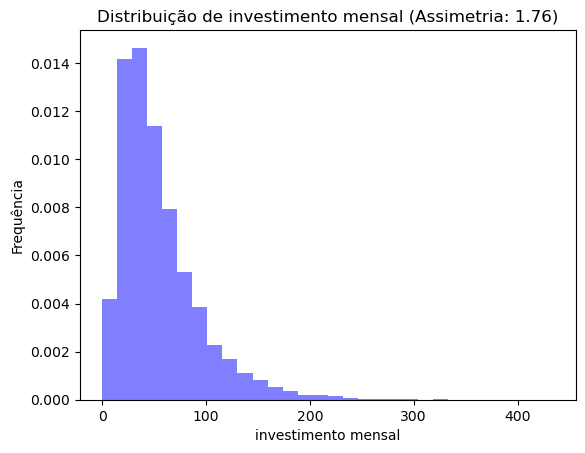

In [39]:
investimento_mensal = df_traduzida['investimento_mensal']


assimetria = skew(investimento_mensal)


plt.hist(investimento_mensal, bins=30, density=True, alpha=0.5, color='b')


plt.title(f'Distribuição de investimento mensal (Assimetria: {assimetria:.2f})')
plt.xlabel('investimento mensal')
plt.ylabel('Frequência')


plt.show() 

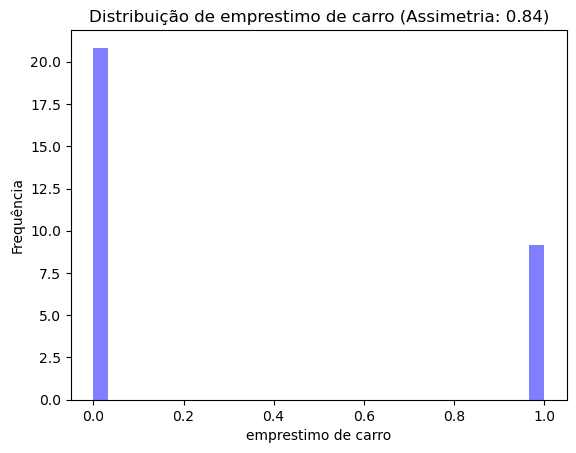

In [40]:
emprestimo_carro = df_traduzida['emprestimo_carro']


assimetria = skew(emprestimo_carro)


plt.hist(emprestimo_carro, bins=30, density=True, alpha=0.5, color='b')


plt.title(f'Distribuição de emprestimo de carro (Assimetria: {assimetria:.2f})')
plt.xlabel('emprestimo de carro')
plt.ylabel('Frequência')


plt.show()

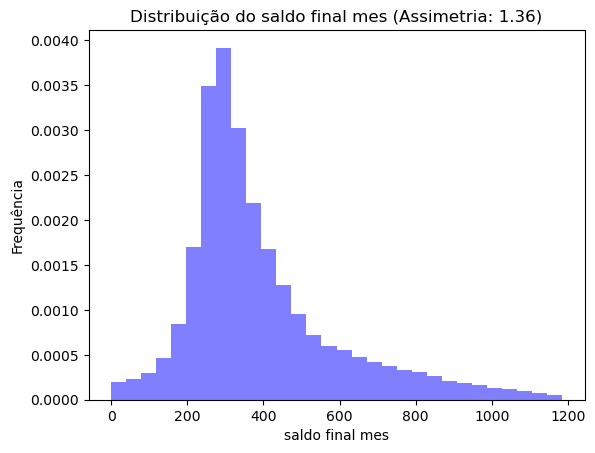

In [41]:
saldo_final_mes = df_traduzida['saldo_final_mes']


assimetria = skew(saldo_final_mes)


plt.hist(saldo_final_mes, bins=30, density=True, alpha=0.5, color='b')


plt.title(f'Distribuição do saldo final mes (Assimetria: {assimetria:.2f})')
plt.xlabel('saldo final mes')
plt.ylabel('Frequência')


plt.show()

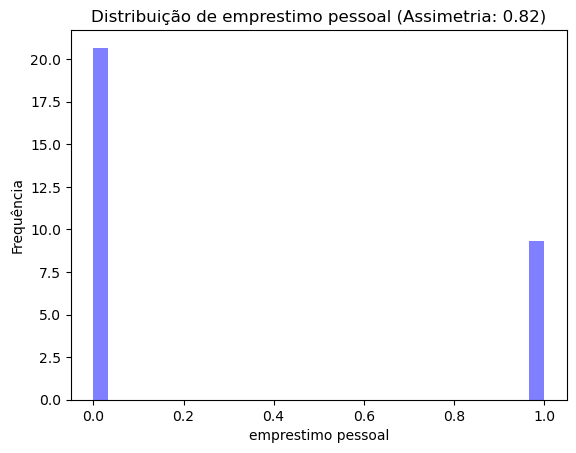

In [42]:
emprestimo_pessoal = df_traduzida['emprestimo_pessoal']


assimetria = skew(emprestimo_pessoal)


plt.hist(emprestimo_pessoal, bins=30, density=True, alpha=0.5, color='b')


plt.title(f'Distribuição de emprestimo pessoal (Assimetria: {assimetria:.2f})')
plt.xlabel('emprestimo pessoal')
plt.ylabel('Frequência')


plt.show()

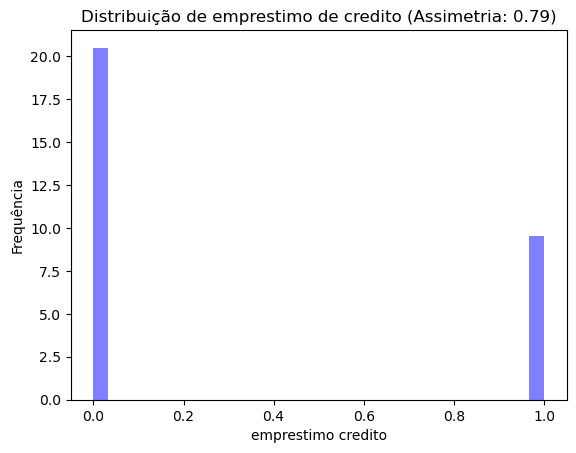

In [43]:
emprestimo_credito = df_traduzida['emprestimo_credito']


assimetria = skew(emprestimo_credito)


plt.hist(emprestimo_credito, bins=30, density=True, alpha=0.5, color='b')


plt.title(f'Distribuição de emprestimo de credito (Assimetria: {assimetria:.2f})')
plt.xlabel('emprestimo credito')
plt.ylabel('Frequência')


plt.show()

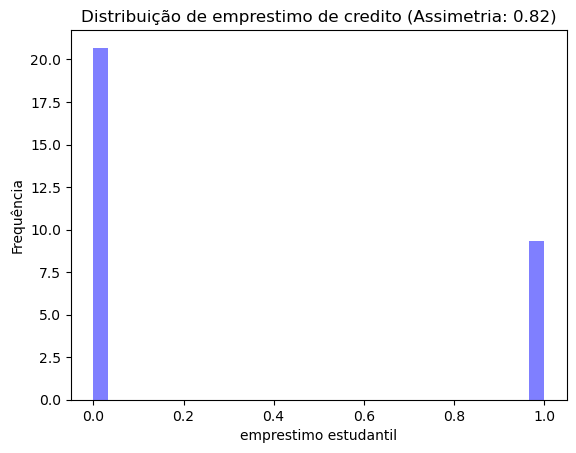

In [44]:
emprestimo_estudantil = df_traduzida['emprestimo_estudantil']


assimetria = skew(emprestimo_estudantil)


plt.hist(emprestimo_estudantil, bins=30, density=True, alpha=0.5, color='b')


plt.title(f'Distribuição de emprestimo de credito (Assimetria: {assimetria:.2f})')
plt.xlabel('emprestimo estudantil')
plt.ylabel('Frequência')


plt.show()

In [45]:
df_traduzida.head()

,mes,idade,profissao,salario_anual,num_contas,num_cartoes,juros_emprestimo,num_emprestimos,dias_atraso,num_pagamentos_atrasados,num_verificacoes_credito,mix_credito,divida_total,taxa_uso_credito,idade_historico_credito,investimento_mensal,comportamento_pagamento,saldo_final_mes,score_credito,emprestimo_carro,emprestimo_casa,emprestimo_pessoal,emprestimo_credito,emprestimo_estudantil
0,1,23.0,cientista,19114.12,3.0,4.0,3.0,4.0,3.0,7.0,4.0,Bom,809.98,26.822620,265.0,21.46538,alto_gasto_pagamento_baixos,312.494089,Good,1,1,1,1,0
1,2,23.0,cientista,19114.12,3.0,4.0,3.0,4.0,3.0,4.0,4.0,Bom,809.98,31.944960,266.0,21.46538,baixo_gasto_pagamento_alto,284.629162,Good,1,1,1,1,0
2,3,23.0,cientista,19114.12,3.0,4.0,3.0,4.0,3.0,7.0,4.0,Bom,809.98,28.609352,267.0,21.46538,baixo_gasto_pagamento_medio,331.209863,Good,1,1,1,1,0
3,4,23.0,cientista,19114.12,3.0,4.0,3.0,4.0,5.0,4.0,4.0,Bom,809.98,31.377862,268.0,21.46538,baixo_gasto_pagamento_baixo,223.451310,Good,1,1,1,1,0
4,5,23.0,cientista,19114.12,3.0,4.0,3.0,4.0,6.0,4.0,4.0,Bom,809.98,24.797347,269.0,21.46538,alto_gasto_pagamento_medio,341.489231,Good,1,1,1,1,0


### CURTOSE

In [46]:
df_traduzida['idade'].kurt()

-0.9268112893124596

In [47]:
df_traduzida['salario_anual'].kurt()

0.608152035282731

In [48]:
df_traduzida['num_contas'].kurt()

-0.6919221934797948

In [49]:
df_traduzida['num_cartoes'].kurt()

-0.327833869110846

In [50]:
df_traduzida['juros_emprestimo'].kurt()

-0.6818771025834751

In [51]:
df_traduzida['num_emprestimos'].kurt()

-0.6145249708025942

In [52]:
df_traduzida['dias_atraso'].kurt()

0.32464334539717

In [53]:
df_traduzida['num_pagamentos_atrasados'].kurt()

-0.7032001616803751

In [54]:
df_traduzida['divida_total'].kurt()

0.9049836897366235

In [55]:
df_traduzida['taxa_uso_credito'].kurt()

-0.9440232466281286

In [56]:
df_traduzida['investimento_mensal'].kurt()

5.025267402770956

In [57]:
df_traduzida['saldo_final_mes'].kurt()

1.8882982977554463

In [58]:
df_traduzida['emprestimo_carro'].kurt()

-1.2876609079448933

In [59]:
df_traduzida['emprestimo_casa'].kurt()

-1.997825904140736

In [60]:
df_traduzida['emprestimo_credito'].kurt()

-1.3834896392483236

In [61]:
df_traduzida['emprestimo_estudantil'].kurt()

-1.3282409178993009

array([[<Axes: title={'center': 'mes'}>,
        <Axes: title={'center': 'idade'}>,
        <Axes: title={'center': 'salario_anual'}>,
        <Axes: title={'center': 'num_contas'}>],
       [<Axes: title={'center': 'num_cartoes'}>,
        <Axes: title={'center': 'juros_emprestimo'}>,
        <Axes: title={'center': 'num_emprestimos'}>,
        <Axes: title={'center': 'dias_atraso'}>],
       [<Axes: title={'center': 'num_pagamentos_atrasados'}>,
        <Axes: title={'center': 'num_verificacoes_credito'}>,
        <Axes: title={'center': 'divida_total'}>,
        <Axes: title={'center': 'taxa_uso_credito'}>],
       [<Axes: title={'center': 'idade_historico_credito'}>,
        <Axes: title={'center': 'investimento_mensal'}>,
        <Axes: title={'center': 'saldo_final_mes'}>,
        <Axes: title={'center': 'emprestimo_carro'}>],
       [<Axes: title={'center': 'emprestimo_casa'}>,
        <Axes: title={'center': 'emprestimo_pessoal'}>,
        <Axes: title={'center': 'emprestimo_cr

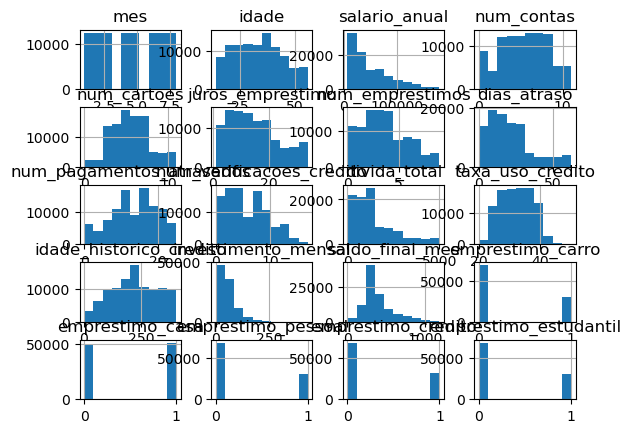

In [62]:
df_traduzida.hist()

### Total de valores únicos de cada variável

In [63]:
valores_unicos = []
for i in df_traduzida.columns[0:12].tolist():
    print(i, ':', len(df_traduzida[i].astype(str).value_counts()))
    valores_unicos.append(len(df_traduzida[i].astype(str).value_counts()))

mes : 8
idade : 43
profissao : 15
salario_anual : 12488
num_contas : 12
num_cartoes : 12
juros_emprestimo : 34
num_emprestimos : 10
dias_atraso : 63
num_pagamentos_atrasados : 26
num_verificacoes_credito : 18
mix_credito : 3


### VERIFICANDO SE HÁ CORRELAÇÃO NAS VARIAVEIS

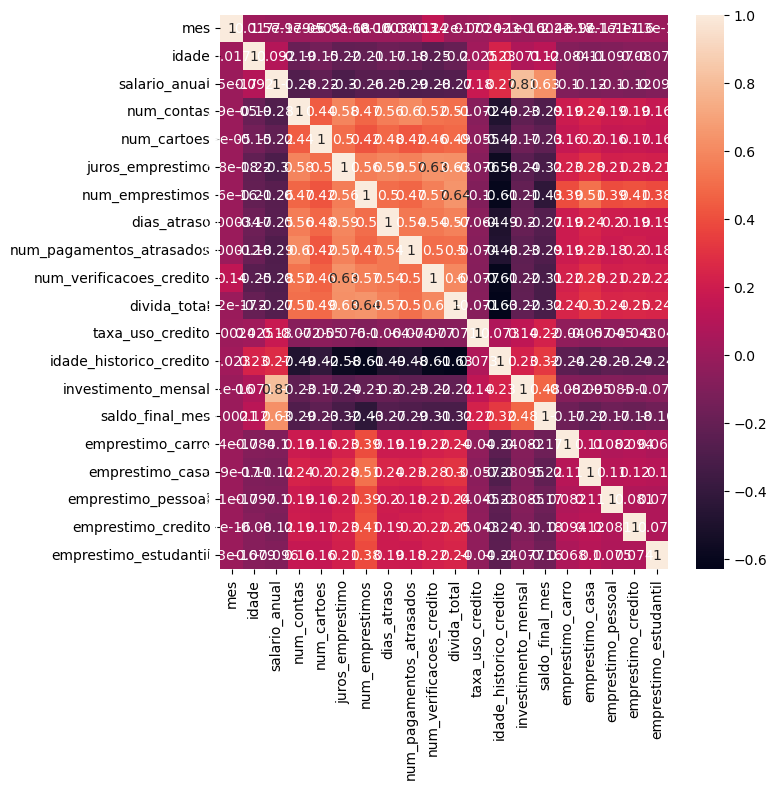

In [64]:
# Suponha que você deseja selecionar apenas colunas numéricas
df_numeric = df_traduzida.select_dtypes(include=['float64', 'int64'])

plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['font.size'] = 10
plt.rcParams['axes.titlesize'] = 20
plt.rcParams["figure.figsize"] = [8.00, 8.00]
plt.rcParams["figure.autolayout"] = True


sns.heatmap(df_numeric.corr(), annot=True)
plt.show()


## verificação de outliers 

mes : int64
idade : float64
salario_anual : float64
num_contas : float64
num_cartoes : float64
juros_emprestimo : float64
num_emprestimos : float64
dias_atraso : float64
num_pagamentos_atrasados : float64
num_verificacoes_credito : float64
divida_total : float64
taxa_uso_credito : float64
idade_historico_credito : float64
investimento_mensal : float64


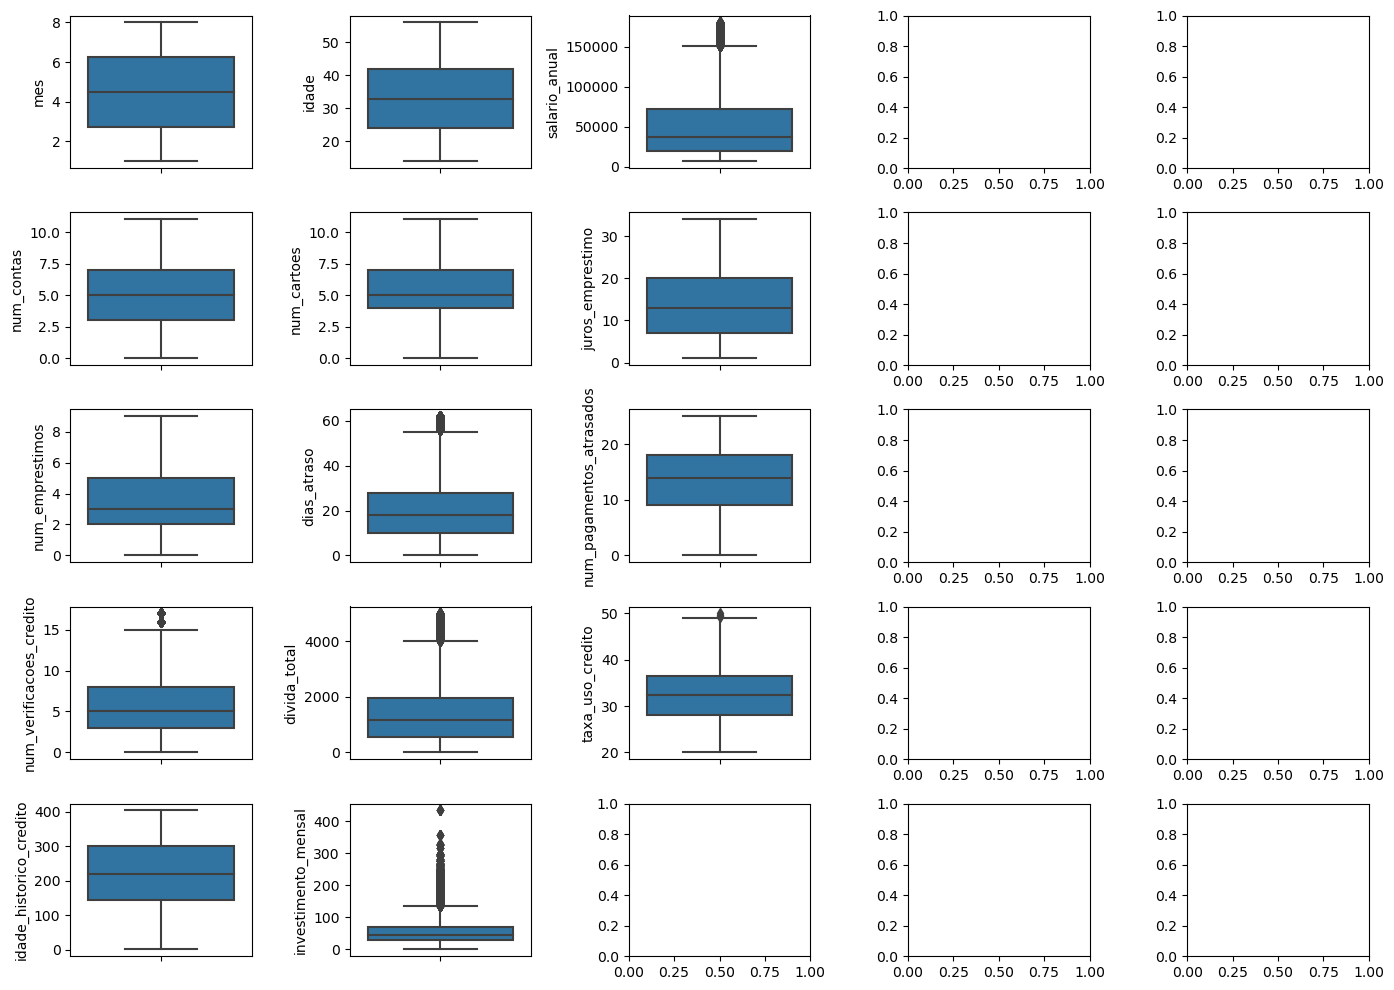

In [65]:
variaveis_numericas = []
for i in df_traduzida.columns[0:16].tolist():
        if df_traduzida.dtypes[i] == 'int64' or df_traduzida.dtypes[i] == 'float64':            
            print(i, ':' , df_traduzida.dtypes[i]) 
            variaveis_numericas.append(i)
 
    
    
    
plt.rcParams["figure.figsize"] = [14.00, 10.00]
plt.rcParams["figure.autolayout"] = True

plt.rcParams['font.size'] = 10 
plt.rcParams['axes.titlesize'] = 20

f, axes = plt.subplots(5, 5) #8 linhas e 4 colunas

linha = 0
coluna = 0
for i in variaveis_numericas:
    sns.boxplot(data = df_traduzida, y=i, ax=axes[linha][coluna])
    coluna += 1
    if coluna == 3:
        linha += 1
        coluna = 0            

plt.show() 

### ANÁLISE EXPLORATÓRIA DOS DADOS COM PYGWALKER

In [66]:
!pip install pygwalker -q
import pygwalker as pyg
pyg.walk(df_traduzida)

Box(children=(HTML(value='<div id="ifr-pyg-0" style="height: auto">\n    <head>\n        <meta http-equiv="Con…

# ANÁLISE DE DADOS

In [67]:
df_traduzida.head()

,mes,idade,profissao,salario_anual,num_contas,num_cartoes,juros_emprestimo,num_emprestimos,dias_atraso,num_pagamentos_atrasados,num_verificacoes_credito,mix_credito,divida_total,taxa_uso_credito,idade_historico_credito,investimento_mensal,comportamento_pagamento,saldo_final_mes,score_credito,emprestimo_carro,emprestimo_casa,emprestimo_pessoal,emprestimo_credito,emprestimo_estudantil
0,1,23.0,cientista,19114.12,3.0,4.0,3.0,4.0,3.0,7.0,4.0,Bom,809.98,26.822620,265.0,21.46538,alto_gasto_pagamento_baixos,312.494089,Good,1,1,1,1,0
1,2,23.0,cientista,19114.12,3.0,4.0,3.0,4.0,3.0,4.0,4.0,Bom,809.98,31.944960,266.0,21.46538,baixo_gasto_pagamento_alto,284.629162,Good,1,1,1,1,0
2,3,23.0,cientista,19114.12,3.0,4.0,3.0,4.0,3.0,7.0,4.0,Bom,809.98,28.609352,267.0,21.46538,baixo_gasto_pagamento_medio,331.209863,Good,1,1,1,1,0
3,4,23.0,cientista,19114.12,3.0,4.0,3.0,4.0,5.0,4.0,4.0,Bom,809.98,31.377862,268.0,21.46538,baixo_gasto_pagamento_baixo,223.451310,Good,1,1,1,1,0
4,5,23.0,cientista,19114.12,3.0,4.0,3.0,4.0,6.0,4.0,4.0,Bom,809.98,24.797347,269.0,21.46538,alto_gasto_pagamento_medio,341.489231,Good,1,1,1,1,0


In [68]:
df_traduzida.describe()

,mes,idade,salario_anual,num_contas,num_cartoes,juros_emprestimo,num_emprestimos,dias_atraso,num_pagamentos_atrasados,num_verificacoes_credito,divida_total,taxa_uso_credito,idade_historico_credito,investimento_mensal,saldo_final_mes,emprestimo_carro,emprestimo_casa,emprestimo_pessoal,emprestimo_credito,emprestimo_estudantil
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.00000
mean,4.500000,33.316340,50505.123449,5.368820,5.533570,14.53208,3.532880,21.08141,13.313120,5.798250,1426.220376,32.285173,221.220460,55.101315,392.697586,0.305600,0.511760,0.311040,0.31728,0.31040
std,2.291299,10.764812,38299.422093,2.593314,2.067098,8.74133,2.446356,14.80456,6.237166,3.867826,1155.129026,5.116875,99.680716,39.006932,201.652719,0.460663,0.499864,0.462921,0.46542,0.46266
min,1.000000,14.000000,7005.930000,0.000000,0.000000,1.00000,0.000000,0.00000,0.000000,0.000000,0.230000,20.000000,1.000000,0.000000,0.007760,0.000000,0.000000,0.000000,0.00000,0.00000
25%,2.750000,24.000000,19342.972500,3.000000,4.000000,7.00000,2.000000,10.00000,9.000000,3.000000,566.072500,28.052567,144.000000,27.959111,267.615983,0.000000,0.000000,0.000000,0.00000,0.00000
50%,4.500000,33.000000,36999.705000,5.000000,5.000000,13.00000,3.000000,18.00000,14.000000,5.000000,1166.155000,32.305784,219.000000,45.156550,333.865366,0.000000,1.000000,0.000000,0.00000,0.00000
75%,6.250000,42.000000,71683.470000,7.000000,7.000000,20.00000,5.000000,28.00000,18.000000,8.000000,1945.962500,36.496663,302.000000,71.295797,463.215683,1.000000,1.000000,1.000000,1.00000,1.00000
max,8.000000,56.000000,179987.280000,11.000000,11.000000,34.00000,9.000000,62.00000,25.000000,17.000000,4998.070000,50.000000,404.000000,434.191089,1183.930696,1.000000,1.000000,1.000000,1.00000,1.00000


### AGRUPAMENTO DE DADOS

In [69]:
df_traduzida.groupby(df_traduzida['mes']).size()

mes
1    12500
2    12500
3    12500
4    12500
5    12500
6    12500
7    12500
8    12500
dtype: int64

In [70]:
df_traduzida.groupby(df_traduzida['profissao']).size()

profissao
advogado         7096
arquiteto        6824
cientista        6744
contador         6744
desenvolvedor    6720
empresario       6648
engenheiro       6864
escritor         6304
gerente          6432
gerente_midia    6720
jornalista       6536
mecanico         6776
medico           6568
musico           6352
professor        6672
dtype: int64

In [71]:
df_traduzida.groupby(df_traduzida['mix_credito']).size()

mix_credito
Bom       30384
Normal    45848
Ruim      23768
dtype: int64

In [72]:
df_traduzida.groupby(df_traduzida['comportamento_pagamento']).size()

comportamento_pagamento
alto_gasto_pagamento_alto      14726
alto_gasto_pagamento_baixos    11764
alto_gasto_pagamento_medio     19738
baixo_gasto_pagamento_alto     10757
baixo_gasto_pagamento_baixo    28616
baixo_gasto_pagamento_medio    14399
dtype: int64

In [73]:
df_traduzida.groupby(df_traduzida['emprestimo_carro']).size()

emprestimo_carro
0    69440
1    30560
dtype: int64

In [74]:
df_traduzida.groupby(df_traduzida['emprestimo_casa']).size()

emprestimo_casa
0    48824
1    51176
dtype: int64

In [75]:
df_traduzida.groupby(df_traduzida['emprestimo_pessoal']).size()

emprestimo_pessoal
0    68896
1    31104
dtype: int64

In [76]:
df_traduzida.groupby(df_traduzida['emprestimo_credito']).size()

emprestimo_credito
0    68272
1    31728
dtype: int64

In [77]:
df_traduzida.groupby(df_traduzida['emprestimo_estudantil']).size()

emprestimo_estudantil
0    68960
1    31040
dtype: int64

In [78]:
df_traduzida.groupby(df_traduzida['score_credito']).size()

score_credito
Good        17828
Poor        28998
Standard    53174
dtype: int64

## PLOTANDO EM UM GRAFÍCO

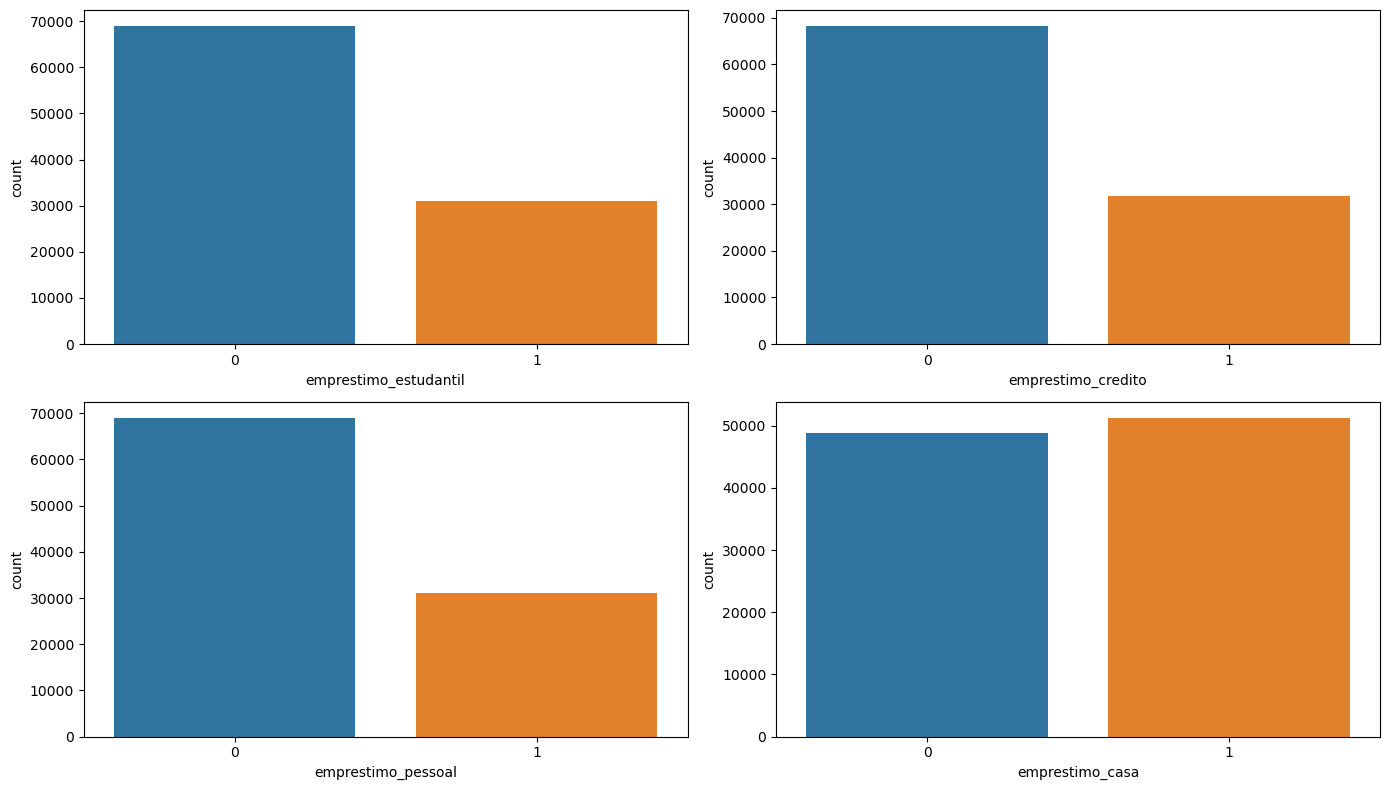

In [79]:
plt.rcParams["figure.figsize"] = [14.00, 8.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(2, 2)

sns.countplot(data = df_traduzida, x="emprestimo_estudantil", ax=axes[0][0])
sns.countplot(data = df_traduzida, x="emprestimo_credito", ax=axes[0][1])
sns.countplot(data = df_traduzida, x="emprestimo_pessoal", ax=axes[1][0])
sns.countplot(data = df_traduzida, x="emprestimo_casa", ax=axes[1][1])

plt.show()

<Axes: xlabel='mes', ylabel='count'>

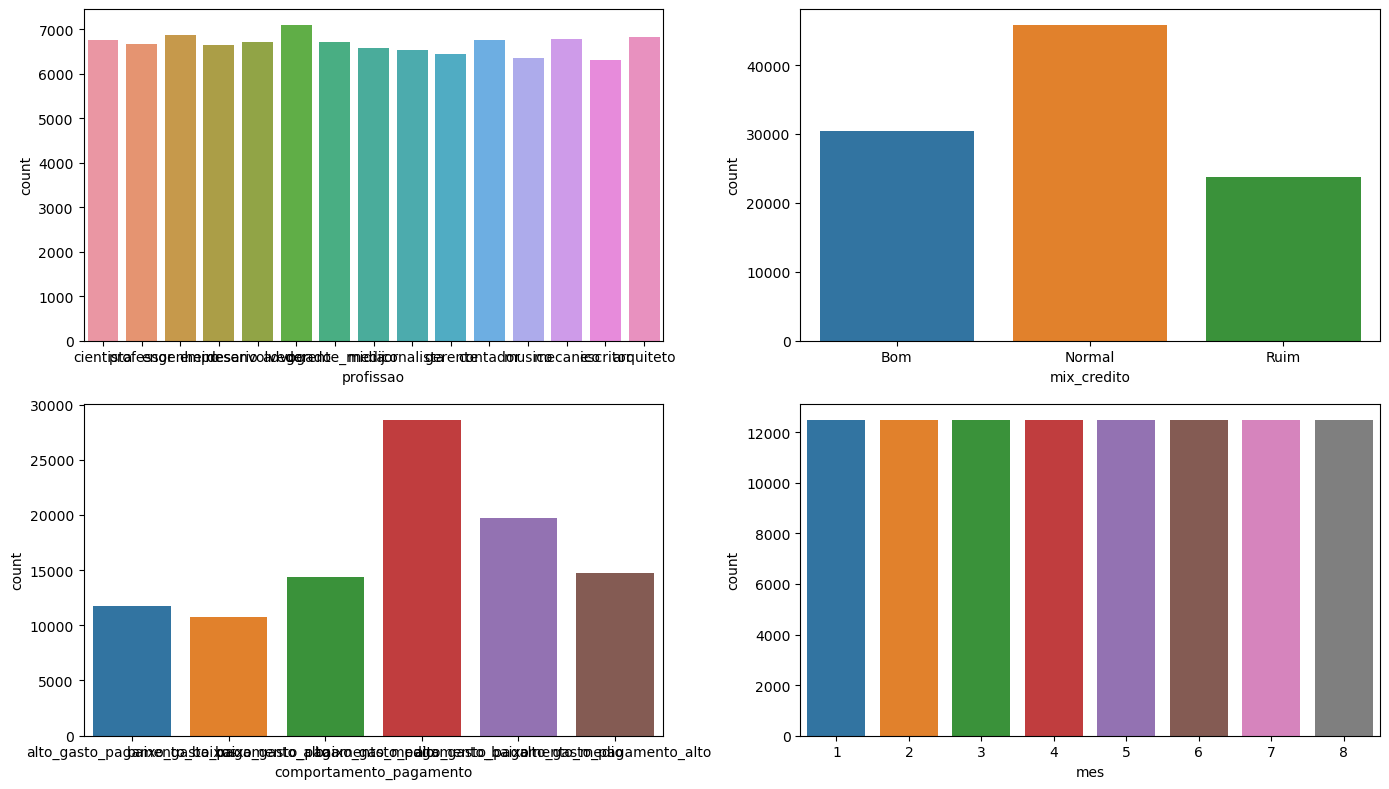

In [80]:
plt.rcParams["figure.figsize"] = [14.00, 8.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(2, 2)

sns.countplot(data = df_traduzida, x="profissao", ax=axes[0][0])
sns.countplot(data = df_traduzida, x="mix_credito", ax=axes[0][1])
sns.countplot(data = df_traduzida, x="comportamento_pagamento", ax=axes[1][0])
sns.countplot(data = df_traduzida, x="mes", ax=axes[1][1])


## SEGMENTANDO AS IDADES PARA A ANÁLISE NAIS DETALHADA

## JOVENS

In [81]:
jovens  = df_traduzida[df_traduzida['idade']<=29] 
jovens['idade'].value_counts().sum()

39989

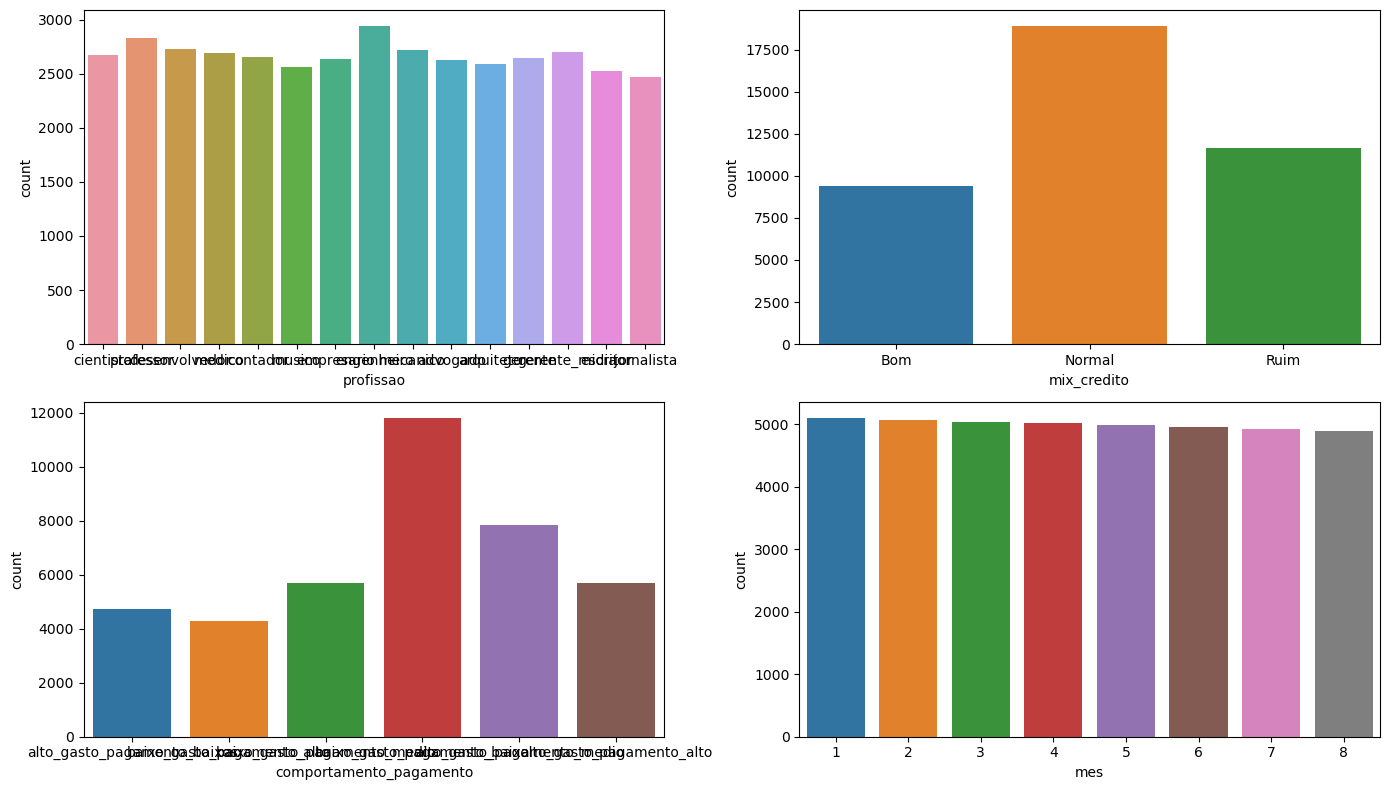

In [82]:
plt.rcParams["figure.figsize"] = [14.00, 8.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(2, 2)

sns.countplot(data = jovens, x="profissao", ax=axes[0][0])
sns.countplot(data = jovens, x="mix_credito", ax=axes[0][1])
sns.countplot(data = jovens, x="comportamento_pagamento", ax=axes[1][0])
sns.countplot(data = jovens, x="mes", ax=axes[1][1])

plt.show()

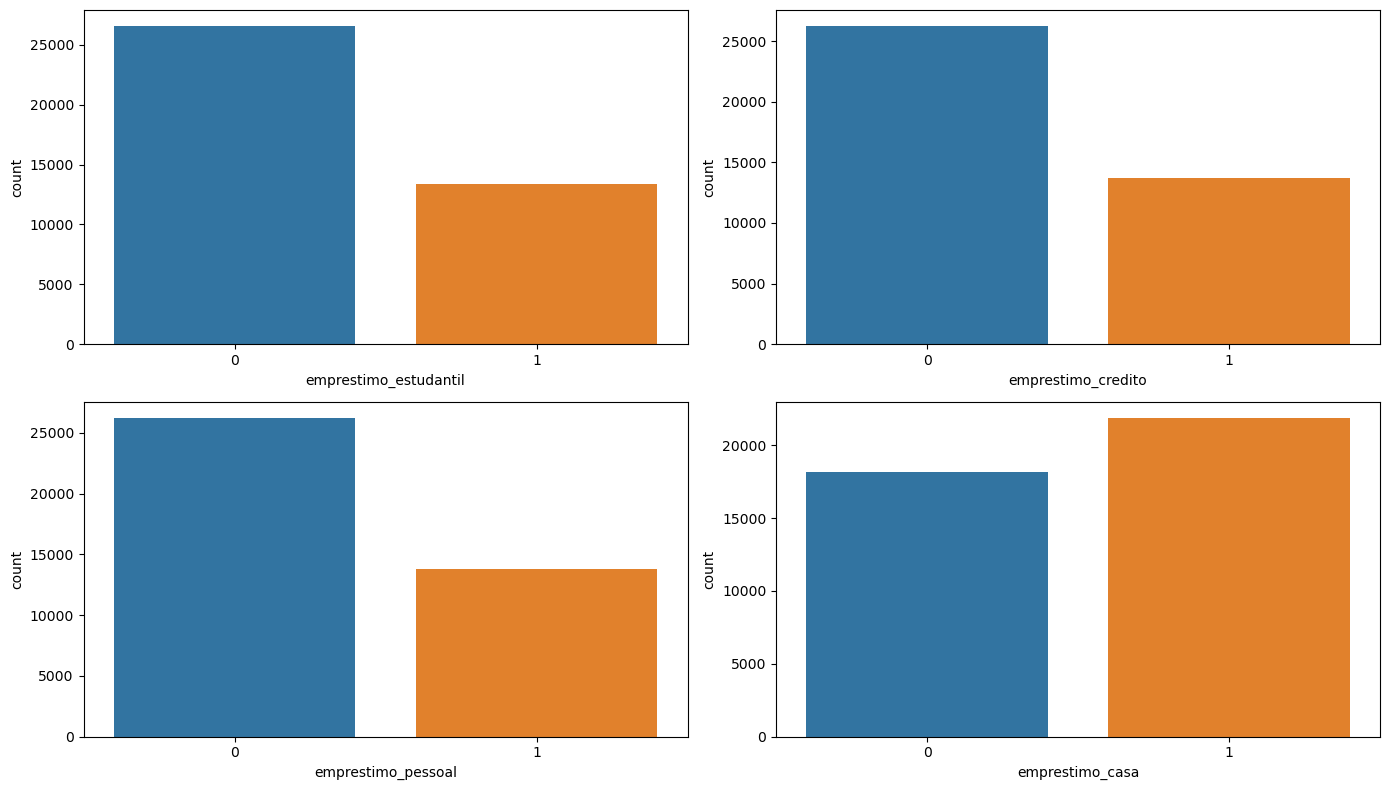

In [83]:
plt.rcParams["figure.figsize"] = [14.00, 8.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(2, 2)

sns.countplot(data = jovens, x="emprestimo_estudantil", ax=axes[0][0])
sns.countplot(data = jovens, x="emprestimo_credito", ax=axes[0][1])
sns.countplot(data = jovens, x="emprestimo_pessoal", ax=axes[1][0])
sns.countplot(data = jovens, x="emprestimo_casa", ax=axes[1][1])

plt.show()

## ANALISANDO OS DADOS DAS PROFISSÔES DOS JOVENS 

In [84]:
numero = jovens.groupby(["profissao"])["idade"].count().rename('Quantidade')
mediosal = jovens.groupby(['profissao'])['salario_anual'].mean().rename('MédiaSalarialAnual')
somasal = jovens.groupby(['profissao'])['salario_anual'].sum().rename('SomaSalarialAnual')
juros = jovens.groupby(['profissao'])['juros_emprestimo'].sum().rename('TotalJuros')
mediajuros = jovens.groupby(['profissao'])['juros_emprestimo'].mean().rename('MédiaJuros')
emprestimo = jovens.groupby(['profissao'])['num_emprestimos'].sum().rename('QuantidadeEmpréstimo')
divida = jovens.groupby(['profissao'])['divida_total'].mean().rename('MédiaDivida')
somadivida = jovens.groupby(['profissao'])['divida_total'].sum().rename('SomaDivida')
investimento = jovens.groupby(['profissao'])['investimento_mensal'].mean().rename('MédiaInvestimento')
# Dataframe para os resultados

dados_usuarios = pd.DataFrame({"Quantidade":numero,'SomaSalarialAnual':somasal,'MédiaSalarialAnual':mediosal,'TotalJuros':juros,'MédiaJuros':mediajuros,'QuantidadeEmpréstimo':emprestimo,'SomaDivida':somadivida,'MédiaDivida':divida,'MédiaInvestimento':investimento})
dados_usuarios ['MédiaSalarialAnual'] = dados_usuarios['MédiaSalarialAnual'].map("${:,.2f}".format)
dados_usuarios ["SomaSalarialAnual"] = dados_usuarios["SomaSalarialAnual"].map("${:,.2f}".format)
dados_usuarios ['TotalJuros'] = dados_usuarios['TotalJuros'].map("${:,.2f}".format)
dados_usuarios ["MédiaJuros"] = dados_usuarios["MédiaJuros"].map("${:,.2f}".format)
dados_usuarios ['MédiaDivida'] = dados_usuarios['MédiaDivida'].map("${:,.2f}".format)
dados_usuarios ["SomaDivida"] = dados_usuarios["SomaDivida"].map("${:,.2f}".format)
dados_usuarios ["MédiaInvestimento"] = dados_usuarios["MédiaInvestimento"].map("${:,.2f}".format)
dados_usuarios.sort_values("Quantidade", ascending=False).head(5)

,Quantidade,SomaSalarialAnual,MédiaSalarialAnual,TotalJuros,MédiaJuros,QuantidadeEmpréstimo,SomaDivida,MédiaDivida,MédiaInvestimento
profissao,,,,,,,,,
engenheiro,2942,"$140,207,858.69","$47,657.33","$47,157.00",$16.03,11645.0,"$4,763,948.94","$1,619.29",$51.94
professor,2829,"$136,173,732.25","$48,134.94","$44,016.00",$15.56,10628.0,"$4,335,269.95","$1,532.44",$54.66
desenvolvedor,2732,"$124,658,134.14","$45,628.89","$44,788.00",$16.39,11168.0,"$4,503,347.05","$1,648.37",$51.38
mecanico,2716,"$125,021,006.45","$46,031.30","$43,530.00",$16.03,10676.0,"$4,424,980.18","$1,629.23",$53.43
gerente_midia,2703,"$131,265,167.98","$48,562.77","$41,982.00",$15.53,10564.0,"$4,183,299.64","$1,547.65",$53.03


## ANALISANDO OS DADOS DAS MIX CREDITO DOS JOVENS 

In [85]:
numero = jovens.groupby(["mix_credito"])["idade"].count().rename('Quantidade')
mediosal = jovens.groupby(['mix_credito'])['salario_anual'].mean().rename('MédiaSalarialAnual')
somasal = jovens.groupby(['mix_credito'])['salario_anual'].sum().rename('SomaSalarialAnual')
juros = jovens.groupby(['mix_credito'])['juros_emprestimo'].sum().rename('TotalJuros')
mediajuros = jovens.groupby(['mix_credito'])['juros_emprestimo'].mean().rename('MédiaJuros')
emprestimo = jovens.groupby(['mix_credito'])['num_emprestimos'].sum().rename('QuantidadeEmpréstimo')
divida = jovens.groupby(['mix_credito'])['divida_total'].mean().rename('MédiaDivida')
somadivida = jovens.groupby(['mix_credito'])['divida_total'].sum().rename('SomaDivida')
investimento = jovens.groupby(['mix_credito'])['investimento_mensal'].mean().rename('MédiaInvestimento')
# Dataframe para os resultados

dados_usuarios = pd.DataFrame({"Quantidade":numero,'SomaSalarialAnual':somasal,'MédiaSalarialAnual':mediosal,'TotalJuros':juros,'MédiaJuros':mediajuros,'QuantidadeEmpréstimo':emprestimo,'SomaDivida':somadivida,'MédiaDivida':divida,'MédiaInvestimento':investimento})
dados_usuarios ['MédiaSalarialAnual'] = dados_usuarios['MédiaSalarialAnual'].map("${:,.2f}".format)
dados_usuarios ["SomaSalarialAnual"] = dados_usuarios["SomaSalarialAnual"].map("${:,.2f}".format)
dados_usuarios ['TotalJuros'] = dados_usuarios['TotalJuros'].map("${:,.2f}".format)
dados_usuarios ["MédiaJuros"] = dados_usuarios["MédiaJuros"].map("${:,.2f}".format)
dados_usuarios ['MédiaDivida'] = dados_usuarios['MédiaDivida'].map("${:,.2f}".format)
dados_usuarios ["SomaDivida"] = dados_usuarios["SomaDivida"].map("${:,.2f}".format)
dados_usuarios ["MédiaInvestimento"] = dados_usuarios["MédiaInvestimento"].map("${:,.2f}".format)
dados_usuarios.sort_values("Quantidade", ascending=False).head(5)

,Quantidade,SomaSalarialAnual,MédiaSalarialAnual,TotalJuros,MédiaJuros,QuantidadeEmpréstimo,SomaDivida,MédiaDivida,MédiaInvestimento
mix_credito,,,,,,,,,
Normal,18913,"$874,345,044.45","$46,229.84","$285,657.00",$15.10,62261.0,"$21,430,768.56","$1,133.12",$51.78
Ruim,11682,"$387,627,945.87","$33,181.64","$287,461.00",$24.61,74317.0,"$35,014,210.21","$2,997.28",$40.90
Bom,9394,"$654,065,686.76","$69,625.90","$59,277.00",$6.31,19133.0,"$7,022,652.58",$747.57,$70.39


## ANALISANDO OS DADOS DAS COMPORTAMENTO E DE PAGAMENTO DOS JOVENS 

In [86]:
numero = jovens.groupby(["comportamento_pagamento"])["idade"].count().rename('Quantidade')
mediosal = jovens.groupby(['comportamento_pagamento'])['salario_anual'].mean().rename('MédiaSalarialAnual')
somasal = jovens.groupby(['comportamento_pagamento'])['salario_anual'].sum().rename('SomaSalarialAnual')
juros = jovens.groupby(['comportamento_pagamento'])['juros_emprestimo'].sum().rename('TotalJuros')
mediajuros = jovens.groupby(['comportamento_pagamento'])['juros_emprestimo'].mean().rename('MédiaJuros')
emprestimo = jovens.groupby(['comportamento_pagamento'])['num_emprestimos'].sum().rename('QuantidadeEmpréstimo')
divida = jovens.groupby(['comportamento_pagamento'])['divida_total'].mean().rename('MédiaDivida')
somadivida = jovens.groupby(['comportamento_pagamento'])['divida_total'].sum().rename('SomaDivida')
investimento = jovens.groupby(['comportamento_pagamento'])['investimento_mensal'].mean().rename('MédiaInvestimento')
# Dataframe para os resultados

dados_usuarios = pd.DataFrame({"Quantidade":numero,'SomaSalarialAnual':somasal,'MédiaSalarialAnual':mediosal,'TotalJuros':juros,'MédiaJuros':mediajuros,'QuantidadeEmpréstimo':emprestimo,'SomaDivida':somadivida,'MédiaDivida':divida,'MédiaInvestimento':investimento})
dados_usuarios ['MédiaSalarialAnual'] = dados_usuarios['MédiaSalarialAnual'].map("${:,.2f}".format)
dados_usuarios ["SomaSalarialAnual"] = dados_usuarios["SomaSalarialAnual"].map("${:,.2f}".format)
dados_usuarios ['TotalJuros'] = dados_usuarios['TotalJuros'].map("${:,.2f}".format)
dados_usuarios ["MédiaJuros"] = dados_usuarios["MédiaJuros"].map("${:,.2f}".format)
dados_usuarios ['MédiaDivida'] = dados_usuarios['MédiaDivida'].map("${:,.2f}".format)
dados_usuarios ["SomaDivida"] = dados_usuarios["SomaDivida"].map("${:,.2f}".format)
dados_usuarios ["MédiaInvestimento"] = dados_usuarios["MédiaInvestimento"].map("${:,.2f}".format)
dados_usuarios.sort_values("Quantidade", ascending=False).head(5)

,Quantidade,SomaSalarialAnual,MédiaSalarialAnual,TotalJuros,MédiaJuros,QuantidadeEmpréstimo,SomaDivida,MédiaDivida,MédiaInvestimento
comportamento_pagamento,,,,,,,,,
baixo_gasto_pagamento_baixo,11794,"$365,135,711.17","$30,959.45","$203,857.00",$17.28,49868.0,"$20,888,627.68","$1,771.12",$40.86
alto_gasto_pagamento_medio,7825,"$435,509,134.70","$55,656.12","$118,015.00",$15.08,29011.0,"$11,716,210.57","$1,497.28",$58.65
baixo_gasto_pagamento_medio,5697,"$288,467,519.50","$50,634.99","$89,924.00",$15.78,22128.0,"$8,961,544.43","$1,573.03",$57.19
alto_gasto_pagamento_alto,5677,"$411,400,743.19","$72,467.98","$78,642.00",$13.85,19810.0,"$7,698,301.65","$1,356.05",$66.47
alto_gasto_pagamento_baixos,4721,"$226,295,582.10","$47,933.82","$74,977.00",$15.88,18559.0,"$7,561,256.29","$1,601.62",$54.12


## ANALISANDO OS DADOS DAS MIX CRÉDITO DOS JOVENS 

In [87]:
numero = jovens.groupby(["mix_credito"])["idade"].count().rename('Quantidade')
mediosal = jovens.groupby(['mix_credito'])['salario_anual'].mean().rename('MédiaSalarialAnual')
somasal = jovens.groupby(['mix_credito'])['salario_anual'].sum().rename('SomaSalarialAnual')
juros = jovens.groupby(['mix_credito'])['juros_emprestimo'].sum().rename('TotalJuros')
mediajuros = jovens.groupby(['mix_credito'])['juros_emprestimo'].mean().rename('MédiaJuros')
emprestimo = jovens.groupby(['mix_credito'])['num_emprestimos'].sum().rename('QuantidadeEmpréstimo')
divida = jovens.groupby(['mix_credito'])['divida_total'].mean().rename('MédiaDivida')
somadivida = jovens.groupby(['mix_credito'])['divida_total'].sum().rename('SomaDivida')
investimento = jovens.groupby(['mix_credito'])['investimento_mensal'].mean().rename('MédiaInvestimento')
# Dataframe para os resultados

dados_usuarios = pd.DataFrame({"Quantidade":numero,'SomaSalarialAnual':somasal,'MédiaSalarialAnual':mediosal,'TotalJuros':juros,'MédiaJuros':mediajuros,'QuantidadeEmpréstimo':emprestimo,'SomaDivida':somadivida,'MédiaDivida':divida,'MédiaInvestimento':investimento})
dados_usuarios ['MédiaSalarialAnual'] = dados_usuarios['MédiaSalarialAnual'].map("${:,.2f}".format)
dados_usuarios ["SomaSalarialAnual"] = dados_usuarios["SomaSalarialAnual"].map("${:,.2f}".format)
dados_usuarios ['TotalJuros'] = dados_usuarios['TotalJuros'].map("${:,.2f}".format)
dados_usuarios ["MédiaJuros"] = dados_usuarios["MédiaJuros"].map("${:,.2f}".format)
dados_usuarios ['MédiaDivida'] = dados_usuarios['MédiaDivida'].map("${:,.2f}".format)
dados_usuarios ["SomaDivida"] = dados_usuarios["SomaDivida"].map("${:,.2f}".format)
dados_usuarios ["MédiaInvestimento"] = dados_usuarios["MédiaInvestimento"].map("${:,.2f}".format)
dados_usuarios.sort_values("Quantidade", ascending=False).head(5)

,Quantidade,SomaSalarialAnual,MédiaSalarialAnual,TotalJuros,MédiaJuros,QuantidadeEmpréstimo,SomaDivida,MédiaDivida,MédiaInvestimento
mix_credito,,,,,,,,,
Normal,18913,"$874,345,044.45","$46,229.84","$285,657.00",$15.10,62261.0,"$21,430,768.56","$1,133.12",$51.78
Ruim,11682,"$387,627,945.87","$33,181.64","$287,461.00",$24.61,74317.0,"$35,014,210.21","$2,997.28",$40.90
Bom,9394,"$654,065,686.76","$69,625.90","$59,277.00",$6.31,19133.0,"$7,022,652.58",$747.57,$70.39


## ANALISANDO OS DADOS DAS SCORE CRÉDITO DOS JOVENS 

In [88]:
numero = jovens.groupby(["score_credito"])["idade"].count().rename('Quantidade')
mediosal = jovens.groupby(['score_credito'])['salario_anual'].mean().rename('MédiaSalarialAnual')
somasal = jovens.groupby(['score_credito'])['salario_anual'].sum().rename('SomaSalarialAnual')
juros = jovens.groupby(['score_credito'])['juros_emprestimo'].sum().rename('TotalJuros')
mediajuros = jovens.groupby(['score_credito'])['juros_emprestimo'].mean().rename('MédiaJuros')
emprestimo = jovens.groupby(['score_credito'])['num_emprestimos'].sum().rename('QuantidadeEmpréstimo')
divida = jovens.groupby(['score_credito'])['divida_total'].mean().rename('MédiaDivida')
somadivida = jovens.groupby(['score_credito'])['divida_total'].sum().rename('SomaDivida')
investimento = jovens.groupby(['score_credito'])['investimento_mensal'].mean().rename('MédiaInvestimento')
# Dataframe para os resultados

dados_usuarios = pd.DataFrame({"Quantidade":numero,'SomaSalarialAnual':somasal,'MédiaSalarialAnual':mediosal,'TotalJuros':juros,'MédiaJuros':mediajuros,'QuantidadeEmpréstimo':emprestimo,'SomaDivida':somadivida,'MédiaDivida':divida,'MédiaInvestimento':investimento})
dados_usuarios ['MédiaSalarialAnual'] = dados_usuarios['MédiaSalarialAnual'].map("${:,.2f}".format)
dados_usuarios ["SomaSalarialAnual"] = dados_usuarios["SomaSalarialAnual"].map("${:,.2f}".format)
dados_usuarios ['TotalJuros'] = dados_usuarios['TotalJuros'].map("${:,.2f}".format)
dados_usuarios ["MédiaJuros"] = dados_usuarios["MédiaJuros"].map("${:,.2f}".format)
dados_usuarios ['MédiaDivida'] = dados_usuarios['MédiaDivida'].map("${:,.2f}".format)
dados_usuarios ["SomaDivida"] = dados_usuarios["SomaDivida"].map("${:,.2f}".format)
dados_usuarios ["MédiaInvestimento"] = dados_usuarios["MédiaInvestimento"].map("${:,.2f}".format)
dados_usuarios.sort_values("Quantidade", ascending=False).head(5)

,Quantidade,SomaSalarialAnual,MédiaSalarialAnual,TotalJuros,MédiaJuros,QuantidadeEmpréstimo,SomaDivida,MédiaDivida,MédiaInvestimento
score_credito,,,,,,,,,
Standard,21039,"$1,030,955,837.66","$49,002.13","$305,726.00",$14.53,76135.0,"$29,590,992.67","$1,406.48",$53.72
Poor,13286,"$518,865,721.50","$39,053.57","$281,790.00",$21.21,66208.0,"$29,100,613.48","$2,190.32",$46.10
Good,5664,"$366,217,117.92","$64,656.98","$44,879.00",$7.92,13368.0,"$4,776,025.20",$843.22,$66.31


## ADULTOS

In [89]:
adultos = df_traduzida.query('idade > 29 and idade <= 59')
adultos['idade'].value_counts().sum()

60011

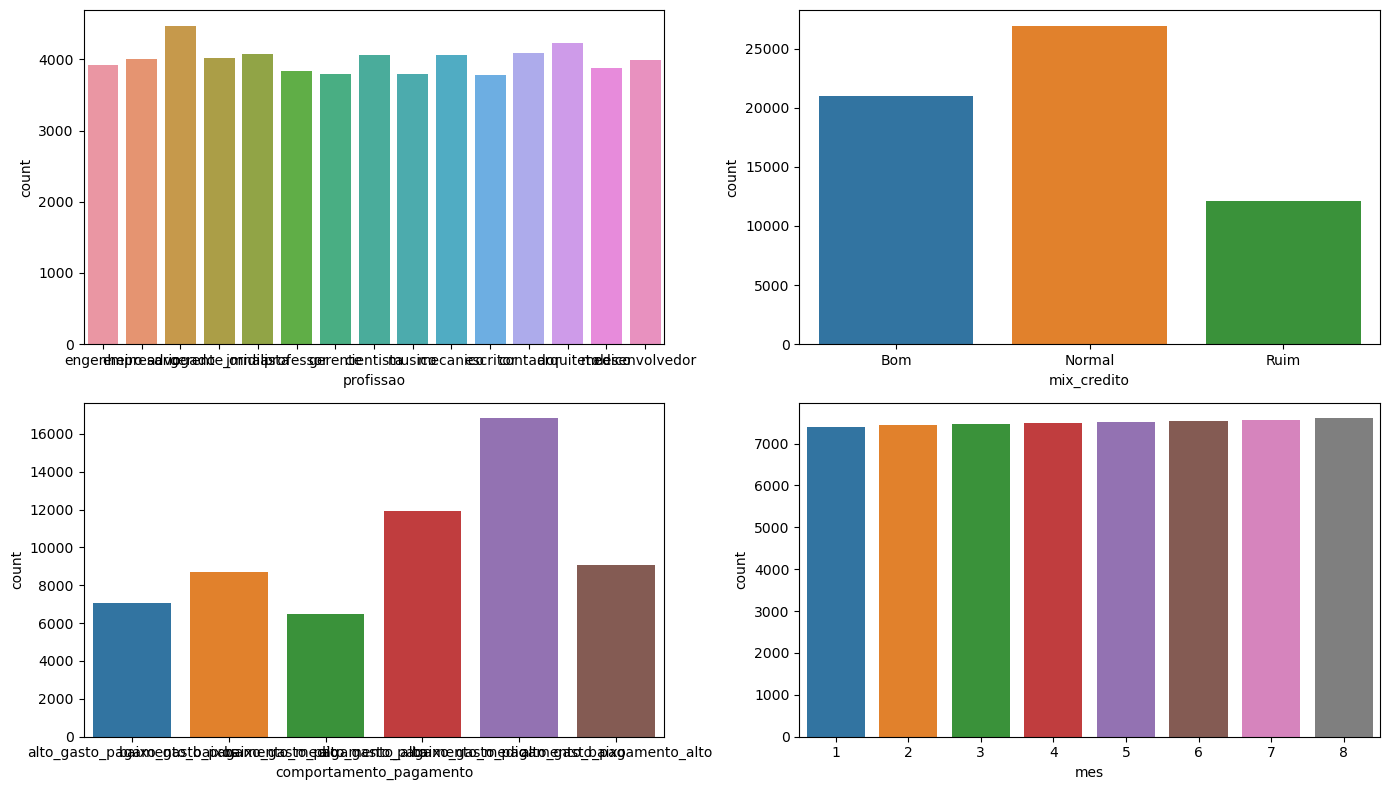

In [90]:
plt.rcParams["figure.figsize"] = [14.00, 8.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(2, 2)

sns.countplot(data = adultos, x="profissao", ax=axes[0][0])
sns.countplot(data = adultos, x="mix_credito", ax=axes[0][1])
sns.countplot(data = adultos, x="comportamento_pagamento", ax=axes[1][0])
sns.countplot(data = adultos, x="mes", ax=axes[1][1])

plt.show()

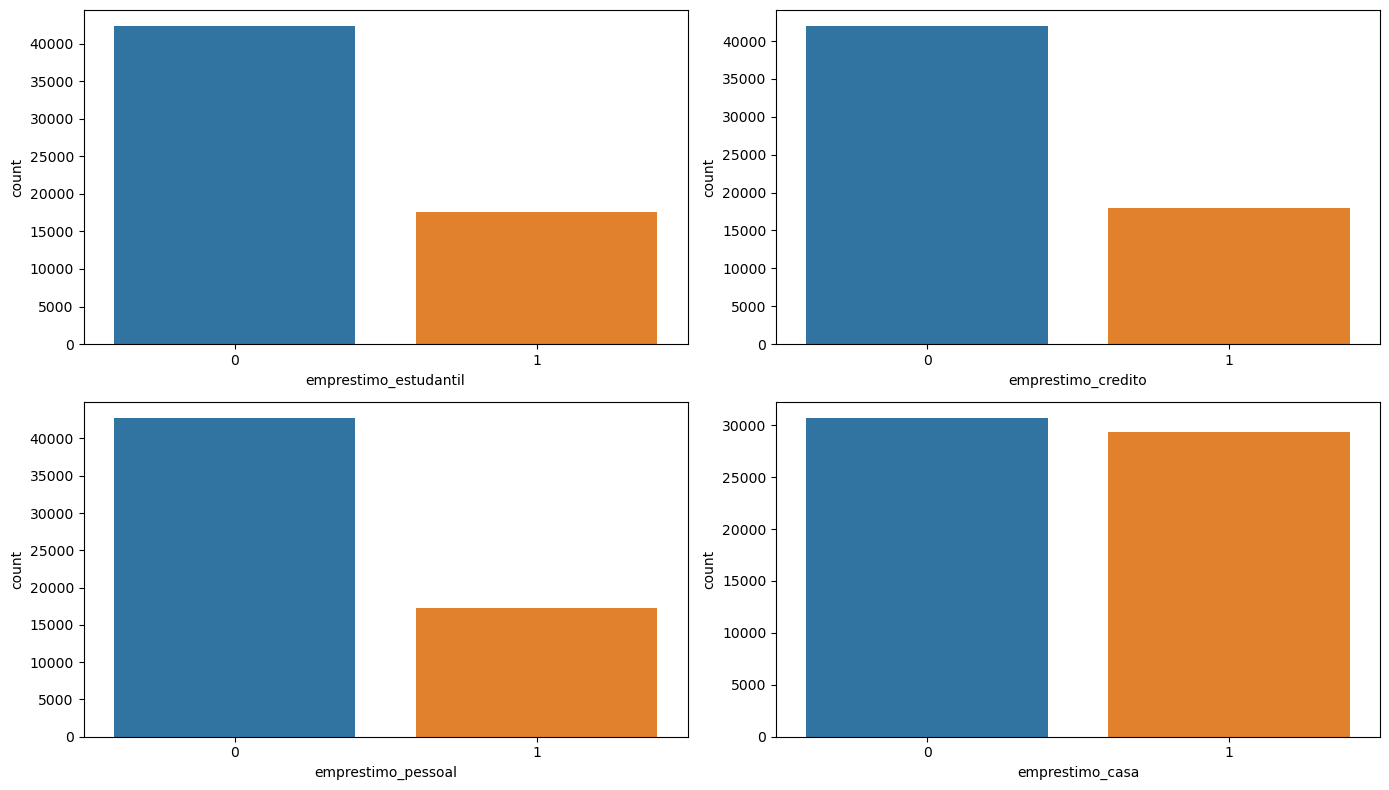

In [91]:
plt.rcParams["figure.figsize"] = [14.00, 8.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(2, 2)

sns.countplot(data = adultos, x="emprestimo_estudantil", ax=axes[0][0])
sns.countplot(data = adultos, x="emprestimo_credito", ax=axes[0][1])
sns.countplot(data = adultos, x="emprestimo_pessoal", ax=axes[1][0])
sns.countplot(data = adultos, x="emprestimo_casa", ax=axes[1][1])

plt.show()

## ANALISANDO AS PROFISSÔES DOS ADULTOS 

In [92]:
numero = adultos.groupby(["profissao"])["idade"].count().rename('Quantidade')
mediosal = adultos.groupby(['profissao'])['salario_anual'].mean().rename('MédiaSalarialAnual')
somasal = adultos.groupby(['profissao'])['salario_anual'].sum().rename('SomaSalarialAnual')
juros = adultos.groupby(['profissao'])['juros_emprestimo'].sum().rename('TotalJuros')
mediajuros = adultos.groupby(['profissao'])['juros_emprestimo'].mean().rename('MédiaJuros')
emprestimo = adultos.groupby(['profissao'])['num_emprestimos'].sum().rename('QuantidadeEmpréstimo')
divida = adultos.groupby(['profissao'])['divida_total'].mean().rename('MédiaDivida')
somadivida = adultos.groupby(['profissao'])['divida_total'].sum().rename('SomaDivida')
investimento = adultos.groupby(['profissao'])['investimento_mensal'].mean().rename('MédiaInvestimento')
# Dataframe para os resultados

dados_usuarios = pd.DataFrame({"Quantidade":numero,'SomaSalarialAnual':somasal,'MédiaSalarialAnual':mediosal,'TotalJuros':juros,'MédiaJuros':mediajuros,'QuantidadeEmpréstimo':emprestimo,'SomaDivida':somadivida,'MédiaDivida':divida,'MédiaInvestimento':investimento})
dados_usuarios ['MédiaSalarialAnual'] = dados_usuarios['MédiaSalarialAnual'].map("${:,.2f}".format)
dados_usuarios ["SomaSalarialAnual"] = dados_usuarios["SomaSalarialAnual"].map("${:,.2f}".format)
dados_usuarios ['TotalJuros'] = dados_usuarios['TotalJuros'].map("${:,.2f}".format)
dados_usuarios ["MédiaJuros"] = dados_usuarios["MédiaJuros"].map("${:,.2f}".format)
dados_usuarios ['MédiaDivida'] = dados_usuarios['MédiaDivida'].map("${:,.2f}".format)
dados_usuarios ["SomaDivida"] = dados_usuarios["SomaDivida"].map("${:,.2f}".format)
dados_usuarios ["MédiaInvestimento"] = dados_usuarios["MédiaInvestimento"].map("${:,.2f}".format)
dados_usuarios.sort_values("Quantidade", ascending=False).head(5)

,Quantidade,SomaSalarialAnual,MédiaSalarialAnual,TotalJuros,MédiaJuros,QuantidadeEmpréstimo,SomaDivida,MédiaDivida,MédiaInvestimento
profissao,,,,,,,,,
advogado,4470,"$223,997,071.01","$50,111.20","$60,699.00",$13.58,14646.0,"$5,495,609.51","$1,229.44",$54.72
arquiteto,4230,"$229,012,381.31","$54,140.04","$57,390.00",$13.57,13838.0,"$5,345,386.54","$1,263.68",$58.62
contador,4094,"$213,482,079.28","$52,145.11","$54,444.00",$13.30,13257.0,"$5,186,760.69","$1,266.92",$57.91
jornalista,4070,"$202,869,124.06","$49,844.99","$55,696.00",$13.68,13116.0,"$5,367,520.51","$1,318.80",$54.03
cientista,4067,"$221,104,203.17","$54,365.43","$56,237.00",$13.83,13885.0,"$5,571,072.69","$1,369.82",$59.20


## ANALISANDO OS DADOS DAS COMPORTAMENTO E DE PAGAMENTO DOS ADULTOS

In [93]:
numero = adultos.groupby(["comportamento_pagamento"])["idade"].count().rename('Quantidade')
mediosal = adultos.groupby(['comportamento_pagamento'])['salario_anual'].mean().rename('MédiaSalarialAnual')
somasal = adultos.groupby(['comportamento_pagamento'])['salario_anual'].sum().rename('SomaSalarialAnual')
juros = adultos.groupby(['comportamento_pagamento'])['juros_emprestimo'].sum().rename('TotalJuros')
mediajuros = adultos.groupby(['comportamento_pagamento'])['juros_emprestimo'].mean().rename('MédiaJuros')
emprestimo = adultos.groupby(['comportamento_pagamento'])['num_emprestimos'].sum().rename('QuantidadeEmpréstimo')
divida = adultos.groupby(['comportamento_pagamento'])['divida_total'].mean().rename('MédiaDivida')
somadivida = adultos.groupby(['comportamento_pagamento'])['divida_total'].sum().rename('SomaDivida')
investimento = adultos.groupby(['comportamento_pagamento'])['investimento_mensal'].mean().rename('MédiaInvestimento')
# Dataframe para os resultados

dados_usuarios = pd.DataFrame({"Quantidade":numero,'SomaSalarialAnual':somasal,'MédiaSalarialAnual':mediosal,'TotalJuros':juros,'MédiaJuros':mediajuros,'QuantidadeEmpréstimo':emprestimo,'SomaDivida':somadivida,'MédiaDivida':divida,'MédiaInvestimento':investimento})
dados_usuarios ['MédiaSalarialAnual'] = dados_usuarios['MédiaSalarialAnual'].map("${:,.2f}".format)
dados_usuarios ["SomaSalarialAnual"] = dados_usuarios["SomaSalarialAnual"].map("${:,.2f}".format)
dados_usuarios ['TotalJuros'] = dados_usuarios['TotalJuros'].map("${:,.2f}".format)
dados_usuarios ["MédiaJuros"] = dados_usuarios["MédiaJuros"].map("${:,.2f}".format)
dados_usuarios ['MédiaDivida'] = dados_usuarios['MédiaDivida'].map("${:,.2f}".format)
dados_usuarios ["SomaDivida"] = dados_usuarios["SomaDivida"].map("${:,.2f}".format)
dados_usuarios ["MédiaInvestimento"] = dados_usuarios["MédiaInvestimento"].map("${:,.2f}".format)
dados_usuarios.sort_values("Quantidade", ascending=False).head(5)

,Quantidade,SomaSalarialAnual,MédiaSalarialAnual,TotalJuros,MédiaJuros,QuantidadeEmpréstimo,SomaDivida,MédiaDivida,MédiaInvestimento
comportamento_pagamento,,,,,,,,,
baixo_gasto_pagamento_baixo,16822,"$564,837,908.54","$33,577.33","$251,748.00",$14.97,61204.0,"$24,990,744.10","$1,485.60",$43.04
alto_gasto_pagamento_medio,11913,"$698,908,298.61","$58,667.70","$158,364.00",$13.29,37546.0,"$15,015,047.88","$1,260.39",$61.27
alto_gasto_pagamento_alto,9049,"$692,733,575.55","$76,553.61","$109,463.00",$12.10,26355.0,"$10,195,651.29","$1,126.72",$69.43
baixo_gasto_pagamento_medio,8702,"$500,442,630.89","$57,508.92","$117,939.00",$13.55,28368.0,"$11,316,889.76","$1,300.49",$63.19
alto_gasto_pagamento_baixos,7043,"$355,297,773.65","$50,446.94","$95,240.00",$13.52,23056.0,"$9,190,491.23","$1,304.91",$56.79


## ANALISANDO OS DADOS DAS MIX CRÉDITO DOS ADULTOS 

In [94]:
numero = adultos.groupby(["mix_credito"])["idade"].count().rename('Quantidade')
mediosal = adultos.groupby(['mix_credito'])['salario_anual'].mean().rename('MédiaSalarialAnual')
somasal = adultos.groupby(['mix_credito'])['salario_anual'].sum().rename('SomaSalarialAnual')
juros = adultos.groupby(['mix_credito'])['juros_emprestimo'].sum().rename('TotalJuros')
mediajuros = adultos.groupby(['mix_credito'])['juros_emprestimo'].mean().rename('MédiaJuros')
emprestimo = adultos.groupby(['mix_credito'])['num_emprestimos'].sum().rename('QuantidadeEmpréstimo')
divida = adultos.groupby(['mix_credito'])['divida_total'].mean().rename('MédiaDivida')
somadivida = adultos.groupby(['mix_credito'])['divida_total'].sum().rename('SomaDivida')
investimento = adultos.groupby(['mix_credito'])['investimento_mensal'].mean().rename('MédiaInvestimento')
# Dataframe para os resultados

dados_usuarios = pd.DataFrame({"Quantidade":numero,'SomaSalarialAnual':somasal,'MédiaSalarialAnual':mediosal,'TotalJuros':juros,'MédiaJuros':mediajuros,'QuantidadeEmpréstimo':emprestimo,'SomaDivida':somadivida,'MédiaDivida':divida,'MédiaInvestimento':investimento})
dados_usuarios ['MédiaSalarialAnual'] = dados_usuarios['MédiaSalarialAnual'].map("${:,.2f}".format)
dados_usuarios ["SomaSalarialAnual"] = dados_usuarios["SomaSalarialAnual"].map("${:,.2f}".format)
dados_usuarios ['TotalJuros'] = dados_usuarios['TotalJuros'].map("${:,.2f}".format)
dados_usuarios ["MédiaJuros"] = dados_usuarios["MédiaJuros"].map("${:,.2f}".format)
dados_usuarios ['MédiaDivida'] = dados_usuarios['MédiaDivida'].map("${:,.2f}".format)
dados_usuarios ["SomaDivida"] = dados_usuarios["SomaDivida"].map("${:,.2f}".format)
dados_usuarios ["MédiaInvestimento"] = dados_usuarios["MédiaInvestimento"].map("${:,.2f}".format)
dados_usuarios.sort_values("Quantidade", ascending=False).head(5)

,Quantidade,SomaSalarialAnual,MédiaSalarialAnual,TotalJuros,MédiaJuros,QuantidadeEmpréstimo,SomaDivida,MédiaDivida,MédiaInvestimento
mix_credito,,,,,,,,,
Normal,26935,"$1,314,093,306.76","$48,787.57","$391,015.00",$14.52,79467.0,"$27,352,197.84","$1,015.49",$53.94
Bom,20990,"$1,424,366,687.92","$67,859.30","$135,819.00",$6.47,41179.0,"$15,503,563.10",$738.62,$69.24
Ruim,12086,"$396,013,673.13","$32,766.31","$293,979.00",$24.32,76931.0,"$36,298,645.31","$3,003.36",$40.18


## ANALISANDO OS DADOS DAS SCORE CRÉDITO DOS ADULTOS 

In [95]:
numero = adultos.groupby(["score_credito"])["idade"].count().rename('Quantidade')
mediosal = adultos.groupby(['score_credito'])['salario_anual'].mean().rename('MédiaSalarialAnual')
somasal = adultos.groupby(['score_credito'])['salario_anual'].sum().rename('SomaSalarialAnual')
juros = adultos.groupby(['score_credito'])['juros_emprestimo'].sum().rename('TotalJuros')
mediajuros = adultos.groupby(['score_credito'])['juros_emprestimo'].mean().rename('MédiaJuros')
emprestimo = adultos.groupby(['score_credito'])['num_emprestimos'].sum().rename('QuantidadeEmpréstimo')
divida = adultos.groupby(['score_credito'])['divida_total'].mean().rename('MédiaDivida')
somadivida = adultos.groupby(['score_credito'])['divida_total'].sum().rename('SomaDivida')
investimento = adultos.groupby(['score_credito'])['investimento_mensal'].mean().rename('MédiaInvestimento')
# Dataframe para os resultados

dados_usuarios = pd.DataFrame({"Quantidade":numero,'SomaSalarialAnual':somasal,'MédiaSalarialAnual':mediosal,'TotalJuros':juros,'MédiaJuros':mediajuros,'QuantidadeEmpréstimo':emprestimo,'SomaDivida':somadivida,'MédiaDivida':divida,'MédiaInvestimento':investimento})
dados_usuarios ['MédiaSalarialAnual'] = dados_usuarios['MédiaSalarialAnual'].map("${:,.2f}".format)
dados_usuarios ["SomaSalarialAnual"] = dados_usuarios["SomaSalarialAnual"].map("${:,.2f}".format)
dados_usuarios ['TotalJuros'] = dados_usuarios['TotalJuros'].map("${:,.2f}".format)
dados_usuarios ["MédiaJuros"] = dados_usuarios["MédiaJuros"].map("${:,.2f}".format)
dados_usuarios ['MédiaDivida'] = dados_usuarios['MédiaDivida'].map("${:,.2f}".format)
dados_usuarios ["SomaDivida"] = dados_usuarios["SomaDivida"].map("${:,.2f}".format)
dados_usuarios ["MédiaInvestimento"] = dados_usuarios["MédiaInvestimento"].map("${:,.2f}".format)
dados_usuarios.sort_values("Quantidade", ascending=False).head(5)

,Quantidade,SomaSalarialAnual,MédiaSalarialAnual,TotalJuros,MédiaJuros,QuantidadeEmpréstimo,SomaDivida,MédiaDivida,MédiaInvestimento
score_credito,,,,,,,,,
Standard,32135,"$1,680,235,665.53","$52,286.78","$425,492.00",$13.24,99986.0,"$38,387,688.58","$1,194.58",$56.45
Poor,15712,"$658,004,053.90","$41,879.08","$303,596.00",$19.32,71699.0,"$31,257,945.13","$1,989.43",$47.82
Good,12164,"$796,233,948.38","$65,458.23","$91,725.00",$7.54,25892.0,"$9,508,772.54",$781.71,$67.93


## ANALISANDO AS PONTUAÇÃO DE CRÉDITO

### PADRÃO

In [96]:
Padrão = df_traduzida.loc[df_traduzida['score_credito'] == 'Standard']
Padrão.head(1)

,mes,idade,profissao,salario_anual,num_contas,num_cartoes,juros_emprestimo,num_emprestimos,dias_atraso,num_pagamentos_atrasados,num_verificacoes_credito,mix_credito,divida_total,taxa_uso_credito,idade_historico_credito,investimento_mensal,comportamento_pagamento,saldo_final_mes,score_credito,emprestimo_carro,emprestimo_casa,emprestimo_pessoal,emprestimo_credito,emprestimo_estudantil
7,8,23.0,cientista,19114.12,3.0,4.0,3.0,4.0,3.0,6.0,4.0,Bom,809.98,23.933795,272.0,21.46538,alto_gasto_pagamento_medio,358.124168,Standard,1,1,1,1,0


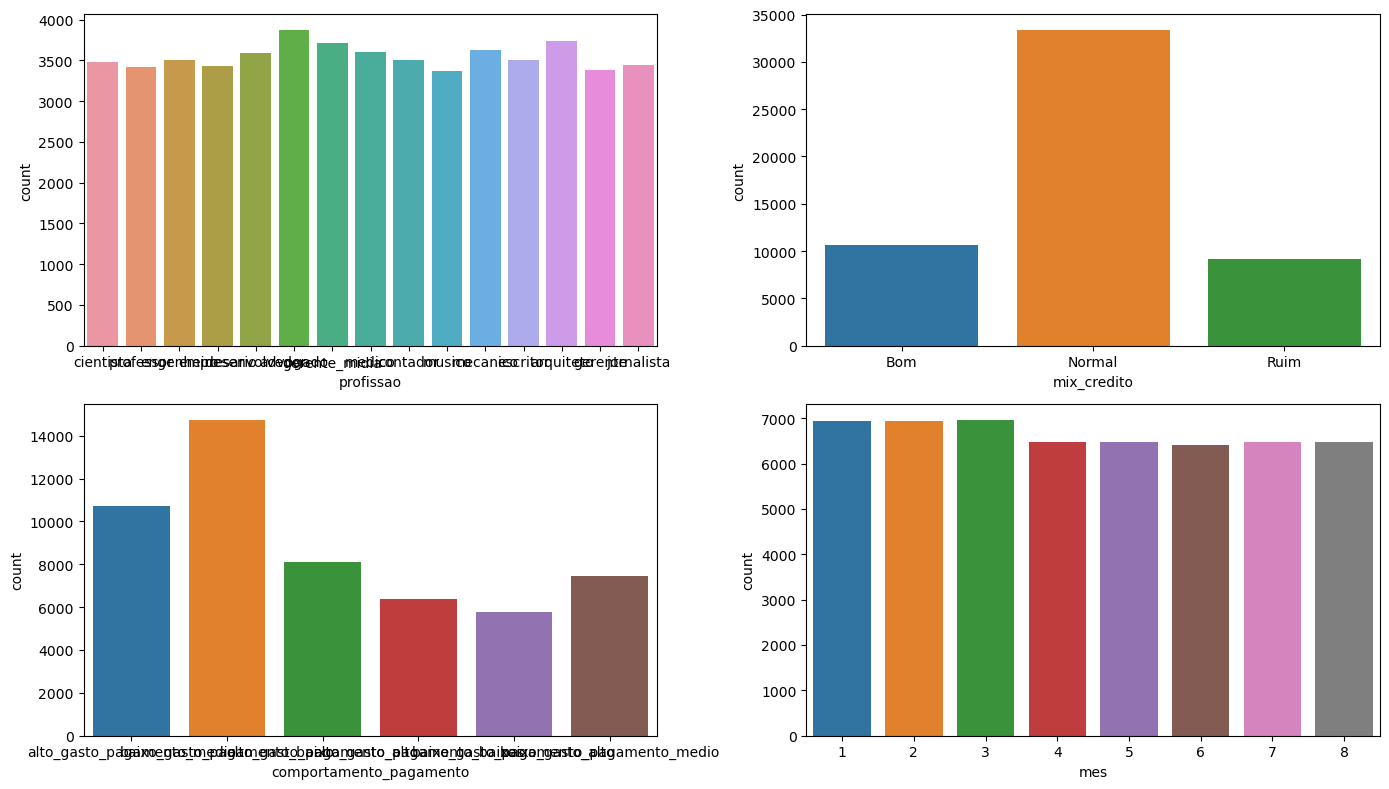

In [97]:
plt.rcParams["figure.figsize"] = [14.00, 8.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(2, 2)

sns.countplot(data = Padrão, x="profissao", ax=axes[0][0])
sns.countplot(data = Padrão, x="mix_credito", ax=axes[0][1])
sns.countplot(data = Padrão, x="comportamento_pagamento", ax=axes[1][0])
sns.countplot(data = Padrão, x="mes", ax=axes[1][1])

plt.show()

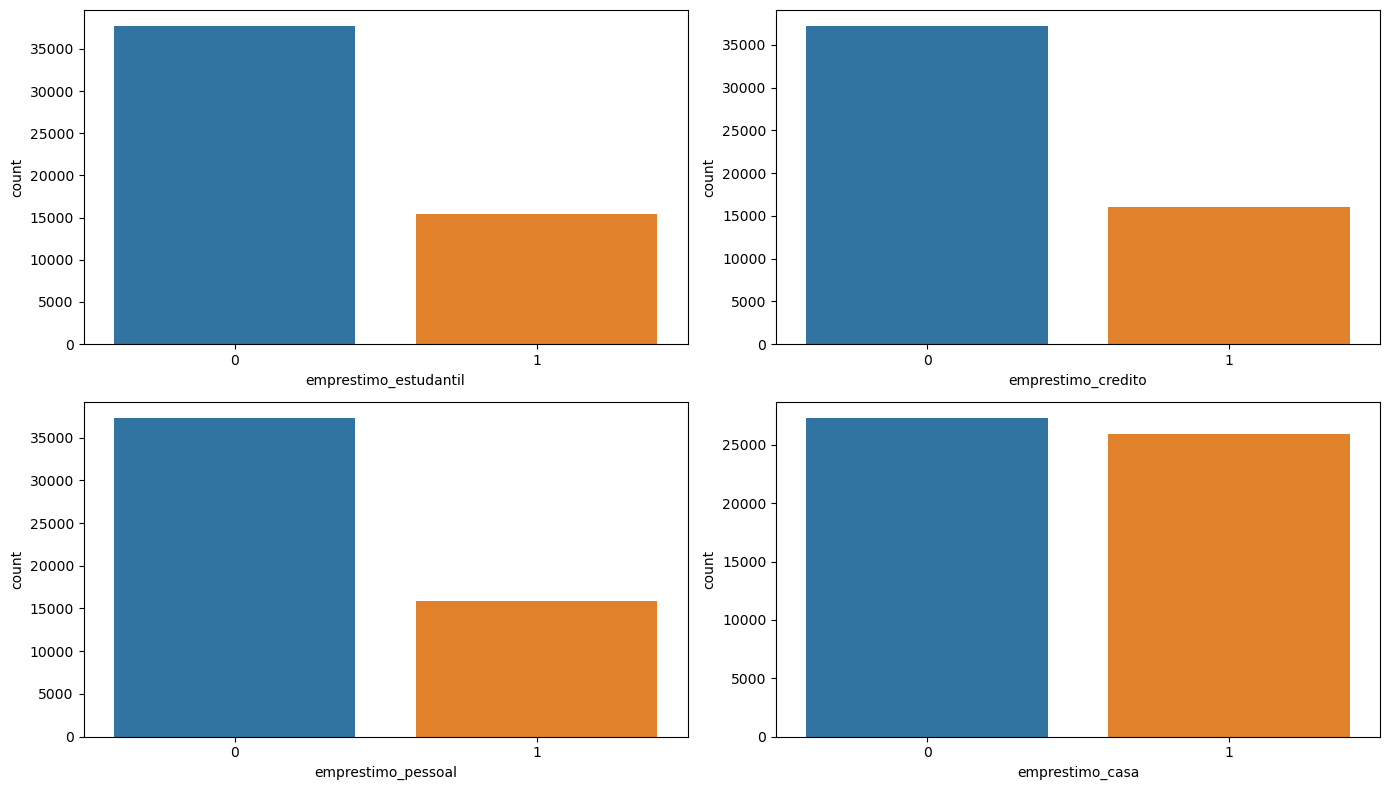

In [98]:
plt.rcParams["figure.figsize"] = [14.00, 8.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(2, 2)

sns.countplot(data = Padrão, x="emprestimo_estudantil", ax=axes[0][0])
sns.countplot(data = Padrão, x="emprestimo_credito", ax=axes[0][1])
sns.countplot(data = Padrão, x="emprestimo_pessoal", ax=axes[1][0])
sns.countplot(data = Padrão, x="emprestimo_casa", ax=axes[1][1])

plt.show()

### AGRUPANDO AS PROFISSÔES DA PONTUAÇÃO PADRÃO

In [99]:
Padrão.groupby(Padrão['profissao']).size().sort_values(ascending=False)


profissao
advogado         3872
arquiteto        3736
gerente_midia    3712
mecanico         3625
medico           3600
desenvolvedor    3586
engenheiro       3506
contador         3502
escritor         3501
cientista        3481
jornalista       3442
empresario       3430
professor        3421
gerente          3386
musico           3374
dtype: int64

### AGRUPANDO OS COMPORTAMENTO DE PAGAMENTO DA PONTUAÇÃO PADRÃO

In [100]:
Padrão.groupby(Padrão['comportamento_pagamento']).size().sort_values(ascending=False)

comportamento_pagamento
baixo_gasto_pagamento_baixo    14736
alto_gasto_pagamento_medio     10711
alto_gasto_pagamento_alto       8117
baixo_gasto_pagamento_medio     7457
alto_gasto_pagamento_baixos     6362
baixo_gasto_pagamento_alto      5791
dtype: int64

### AGRUPANDO OS MIXS CRÉDITO DA PONTUAÇÃO PADRÃO

In [101]:
Padrão.groupby(Padrão['mix_credito']).size().sort_values(ascending=False)

mix_credito
Normal    33361
Bom       10685
Ruim       9128
dtype: int64

### AGRUPANDO POR MÊS DA PONTUAÇÃO PADRÃO

In [102]:
Padrão.groupby(Padrão['mes']).size().sort_values(ascending=False)

mes
3    6965
2    6945
1    6943
8    6485
5    6478
7    6475
4    6473
6    6410
dtype: int64

### POBRE

In [103]:
pobre = df_traduzida.loc[df_traduzida['score_credito'] == 'Poor']
pobre.head(1)

,mes,idade,profissao,salario_anual,num_contas,num_cartoes,juros_emprestimo,num_emprestimos,dias_atraso,num_pagamentos_atrasados,num_verificacoes_credito,mix_credito,divida_total,taxa_uso_credito,idade_historico_credito,investimento_mensal,comportamento_pagamento,saldo_final_mes,score_credito,emprestimo_carro,emprestimo_casa,emprestimo_pessoal,emprestimo_credito,emprestimo_estudantil
56,1,30.0,gerente_midia,34081.38,8.0,7.0,15.0,3.0,30.0,11.0,5.0,Normal,1704.18,24.448063,176.0,29.326364,baixo_gasto_pagamento_alto,298.192158,Poor,1,0,0,0,1


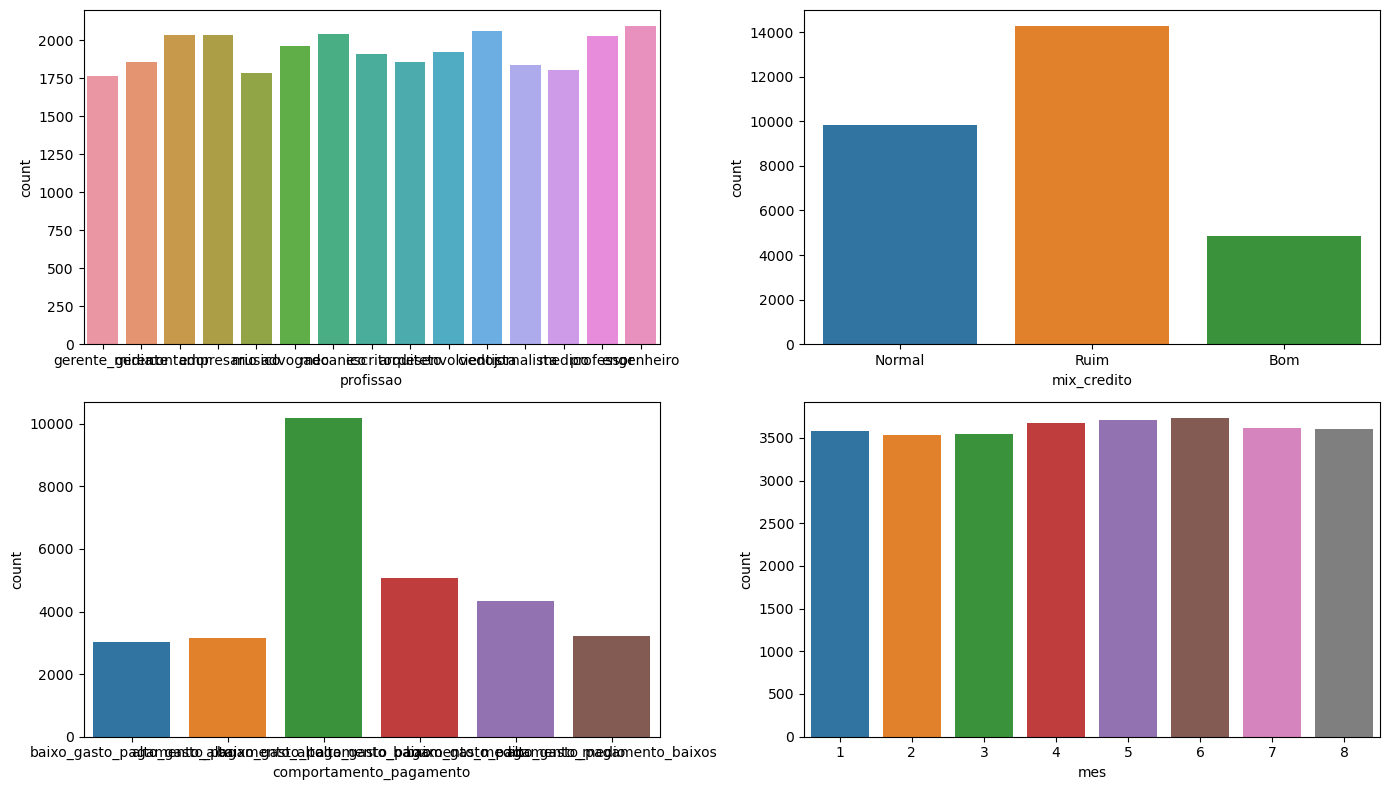

In [104]:
plt.rcParams["figure.figsize"] = [14.00, 8.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(2, 2)

sns.countplot(data = pobre, x="profissao", ax=axes[0][0])
sns.countplot(data = pobre, x="mix_credito", ax=axes[0][1])
sns.countplot(data = pobre, x="comportamento_pagamento", ax=axes[1][0])
sns.countplot(data = pobre, x="mes", ax=axes[1][1])

plt.show()

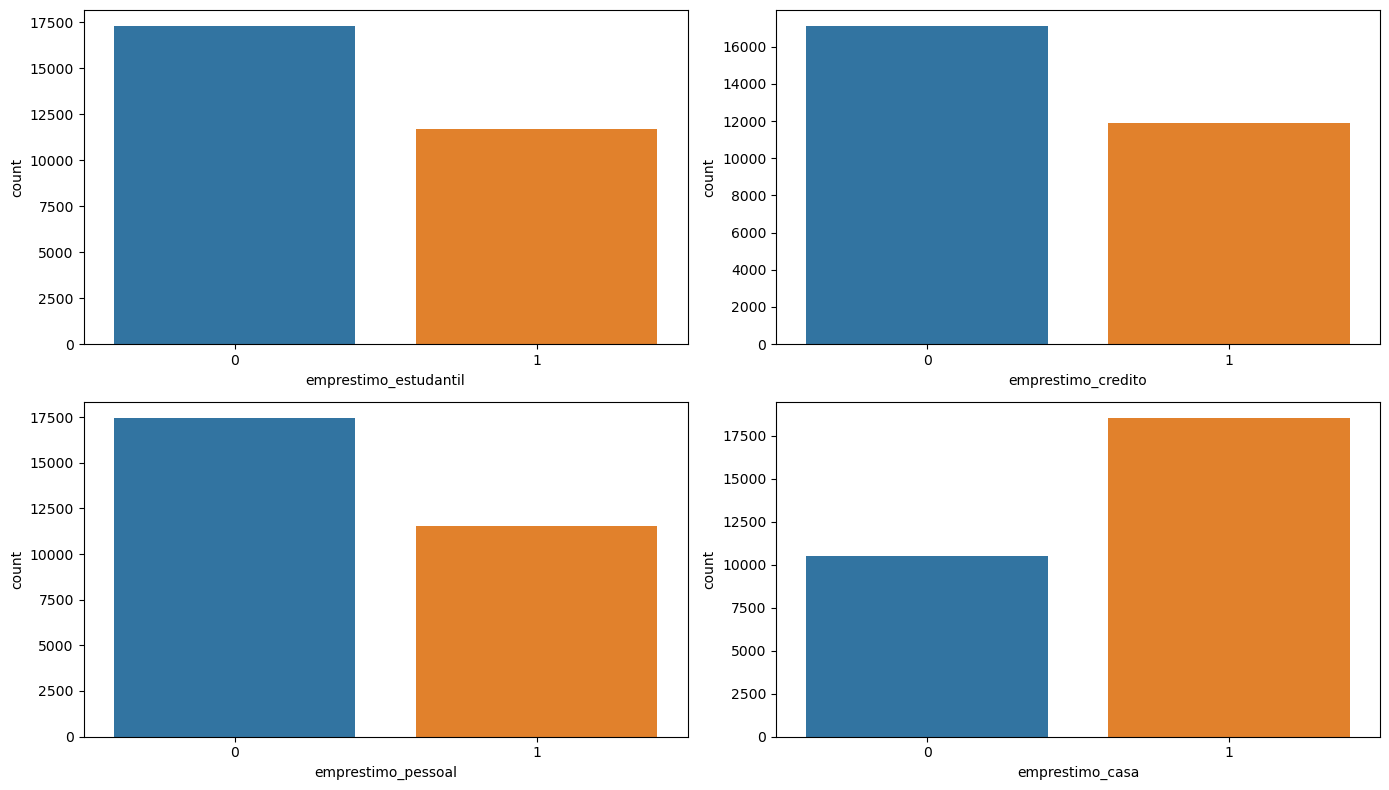

In [105]:
plt.rcParams["figure.figsize"] = [14.00, 8.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(2, 2)

sns.countplot(data = pobre, x="emprestimo_estudantil", ax=axes[0][0])
sns.countplot(data = pobre, x="emprestimo_credito", ax=axes[0][1])
sns.countplot(data = pobre, x="emprestimo_pessoal", ax=axes[1][0])
sns.countplot(data = pobre, x="emprestimo_casa", ax=axes[1][1])

plt.show()

### AGRUPANDO AS PROFISSÔES DA PONTUAÇÃO POBRE

In [106]:
pobre.groupby(pobre['profissao']).size().sort_values(ascending=False)

profissao
engenheiro       2094
cientista        2062
mecanico         2044
contador         2037
empresario       2033
professor        2027
advogado         1965
desenvolvedor    1924
escritor         1907
gerente          1856
arquiteto        1855
jornalista       1840
medico           1804
musico           1786
gerente_midia    1764
dtype: int64

### AGRUPANDO OS COMPORTAMENTO DE PAGAMENTO DOS POBRES

In [107]:
pobre.groupby(pobre['comportamento_pagamento']).size().sort_values(ascending=False)

comportamento_pagamento
baixo_gasto_pagamento_baixo    10175
alto_gasto_pagamento_medio      5073
baixo_gasto_pagamento_medio     4344
alto_gasto_pagamento_baixos     3215
alto_gasto_pagamento_alto       3164
baixo_gasto_pagamento_alto      3027
dtype: int64

### AGRUPANDO OS MIXS CRÉDITO DOS POBRES

In [108]:
pobre.groupby(pobre['mix_credito']).size().sort_values(ascending=False)

mix_credito
Ruim      14289
Normal     9858
Bom        4851
dtype: int64

### AGRUPANDO POR MÊS DOS POBRES

In [109]:
pobre.groupby(pobre['mes']).size().sort_values(ascending=False)

mes
6    3728
5    3712
4    3670
7    3614
8    3602
1    3582
3    3551
2    3539
dtype: int64

### OURO

In [110]:
ouro = df_traduzida.loc[df_traduzida['score_credito'] == 'Good']
ouro.head(1)

,mes,idade,profissao,salario_anual,num_contas,num_cartoes,juros_emprestimo,num_emprestimos,dias_atraso,num_pagamentos_atrasados,num_verificacoes_credito,mix_credito,divida_total,taxa_uso_credito,idade_historico_credito,investimento_mensal,comportamento_pagamento,saldo_final_mes,score_credito,emprestimo_carro,emprestimo_casa,emprestimo_pessoal,emprestimo_credito,emprestimo_estudantil
0,1,23.0,cientista,19114.12,3.0,4.0,3.0,4.0,3.0,7.0,4.0,Bom,809.98,26.82262,265.0,21.46538,alto_gasto_pagamento_baixos,312.494089,Good,1,1,1,1,0


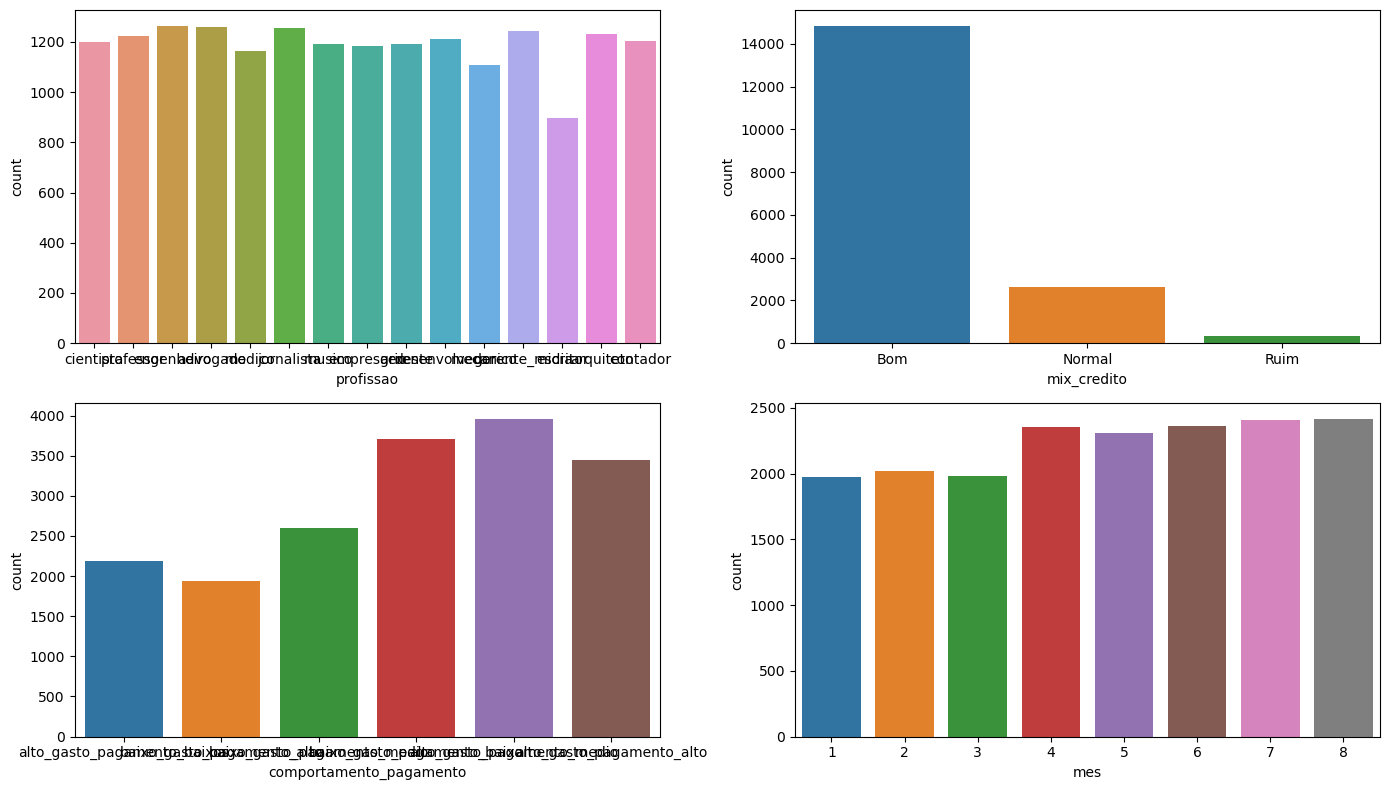

In [111]:
plt.rcParams["figure.figsize"] = [14.00, 8.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(2, 2)

sns.countplot(data = ouro, x="profissao", ax=axes[0][0])
sns.countplot(data = ouro, x="mix_credito", ax=axes[0][1])
sns.countplot(data = ouro, x="comportamento_pagamento", ax=axes[1][0])
sns.countplot(data = ouro, x="mes", ax=axes[1][1])

plt.show()

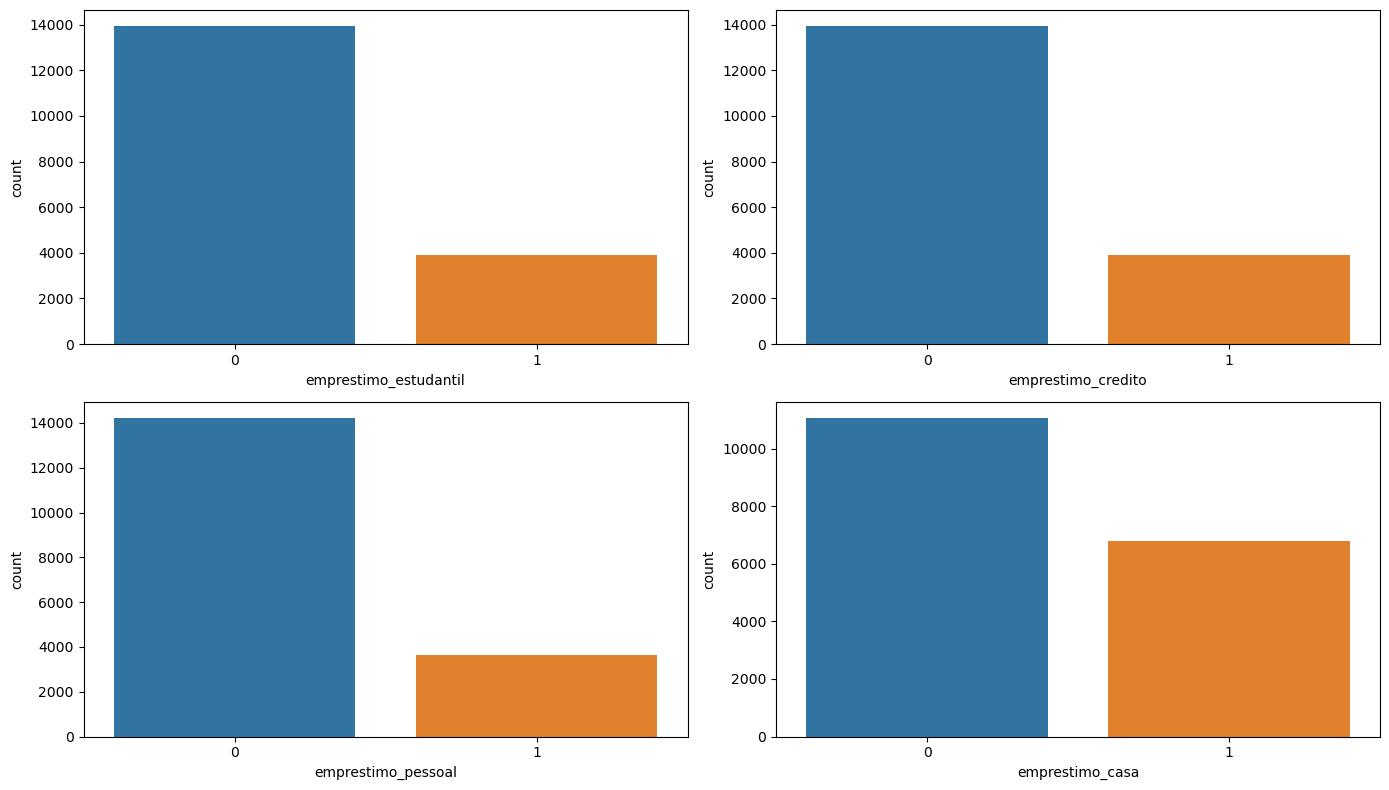

In [112]:
plt.rcParams["figure.figsize"] = [14.00, 8.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(2, 2)

sns.countplot(data = ouro, x="emprestimo_estudantil", ax=axes[0][0])
sns.countplot(data = ouro, x="emprestimo_credito", ax=axes[0][1])
sns.countplot(data = ouro, x="emprestimo_pessoal", ax=axes[1][0])
sns.countplot(data = ouro, x="emprestimo_casa", ax=axes[1][1])

plt.show()

### AGRUPANDO AS PROFISSÔES DA PONTUAÇÃO OURO

In [113]:
ouro.groupby(ouro['profissao']).size().sort_values(ascending=False)

profissao
engenheiro       1264
advogado         1259
jornalista       1254
gerente_midia    1244
arquiteto        1233
professor        1224
desenvolvedor    1210
contador         1205
cientista        1201
musico           1192
gerente          1190
empresario       1185
medico           1164
mecanico         1107
escritor          896
dtype: int64

### AGRUPANDO OS COMPORTAMENTO DE PAGAMENTO DO OURO

In [114]:
ouro.groupby(ouro['comportamento_pagamento']).size().sort_values(ascending=False)

comportamento_pagamento
alto_gasto_pagamento_medio     3954
baixo_gasto_pagamento_baixo    3705
alto_gasto_pagamento_alto      3445
baixo_gasto_pagamento_medio    2598
alto_gasto_pagamento_baixos    2187
baixo_gasto_pagamento_alto     1939
dtype: int64

### AGRUPANDO OS MIXS CRÉDITO DO OURO

In [115]:
ouro.groupby(ouro['mix_credito']).size().sort_values(ascending=False)

mix_credito
Bom       14848
Normal     2629
Ruim        351
dtype: int64

### AGRUPANDO POR MÊS DO OURO

In [116]:
ouro.groupby(ouro['mes']).size().sort_values(ascending=False)

mes
8    2413
7    2411
6    2362
4    2357
5    2310
2    2016
3    1984
1    1975
dtype: int64

# MACHINE LARNING 

## PRÉ-PROCESSAMENTO

In [117]:
df_traduzida.head(1)

,mes,idade,profissao,salario_anual,num_contas,num_cartoes,juros_emprestimo,num_emprestimos,dias_atraso,num_pagamentos_atrasados,num_verificacoes_credito,mix_credito,divida_total,taxa_uso_credito,idade_historico_credito,investimento_mensal,comportamento_pagamento,saldo_final_mes,score_credito,emprestimo_carro,emprestimo_casa,emprestimo_pessoal,emprestimo_credito,emprestimo_estudantil
0,1,23.0,cientista,19114.12,3.0,4.0,3.0,4.0,3.0,7.0,4.0,Bom,809.98,26.82262,265.0,21.46538,alto_gasto_pagamento_baixos,312.494089,Good,1,1,1,1,0


In [118]:
del df_traduzida['mes']
del df_traduzida['num_verificacoes_credito']
del df_traduzida['idade_historico_credito']

In [119]:
df_traduzida = df_traduzida [['idade', 'profissao', 'salario_anual', 'num_contas', 'num_cartoes', 'juros_emprestimo', 'num_emprestimos', 'dias_atraso', 'num_pagamentos_atrasados', 'mix_credito', 'divida_total', 'taxa_uso_credito', 'investimento_mensal', 'comportamento_pagamento', 'saldo_final_mes', 'emprestimo_carro', 'emprestimo_casa', 'emprestimo_pessoal', 'emprestimo_credito', 'emprestimo_estudantil', 'score_credito']]

In [120]:
# Cria o encoder
lb = LabelEncoder()

# Aplica o encoder nas variáveis que estão com string
df_traduzida['profissao'] = lb.fit_transform(df_traduzida['profissao'])
df_traduzida['mix_credito'] = lb.fit_transform(df_traduzida['mix_credito'])
df_traduzida['comportamento_pagamento'] = lb.fit_transform(df_traduzida['comportamento_pagamento'])
df_traduzida['score_credito'] = lb.fit_transform(df_traduzida['score_credito'])

# Remove valores missing eventualmente gerados
df_traduzida.dropna(inplace = True)

In [121]:
# Supondo que 'df_traduzida' seja o DataFrame com seus dados
# Separa X e y
X = df_traduzida.iloc[:, :-1]
y = df_traduzida.iloc[:, -1]

### AVALIANDO AS MELHORES VARIAVEIS

In [122]:
from sklearn.ensemble import ExtraTreesClassifier

# Criação do Modelo - Feature Selection
modelo1 = ExtraTreesClassifier()
modelo1.fit(X, y)

ExtraTreesClassifier()

In [123]:
# Print dos Resultados
print(df_traduzida.columns[0:22])
print(modelo1.feature_importances_)

Index(['idade', 'profissao', 'salario_anual', 'num_contas', 'num_cartoes',
       'juros_emprestimo', 'num_emprestimos', 'dias_atraso',
       'num_pagamentos_atrasados', 'mix_credito', 'divida_total',
       'taxa_uso_credito', 'investimento_mensal', 'comportamento_pagamento',
       'saldo_final_mes', 'emprestimo_carro', 'emprestimo_casa',
       'emprestimo_pessoal', 'emprestimo_credito', 'emprestimo_estudantil',
       'score_credito'],
      dtype='object')
[0.05381511 0.03618042 0.03929819 0.04533133 0.05439945 0.08333476
 0.04031397 0.07469244 0.06530823 0.10934257 0.08133713 0.0796668
 0.03724109 0.05499006 0.08201941 0.01257351 0.01239262 0.01260438
 0.0123956  0.01276294]


Contagem de classes antes do balanceamento:
score_credito
2    53174
1    28998
0    17828
Name: count, dtype: int64

Contagem de classes após o balanceamento:
score_credito
0    53174
2    53174
1    53174
Name: count, dtype: int64


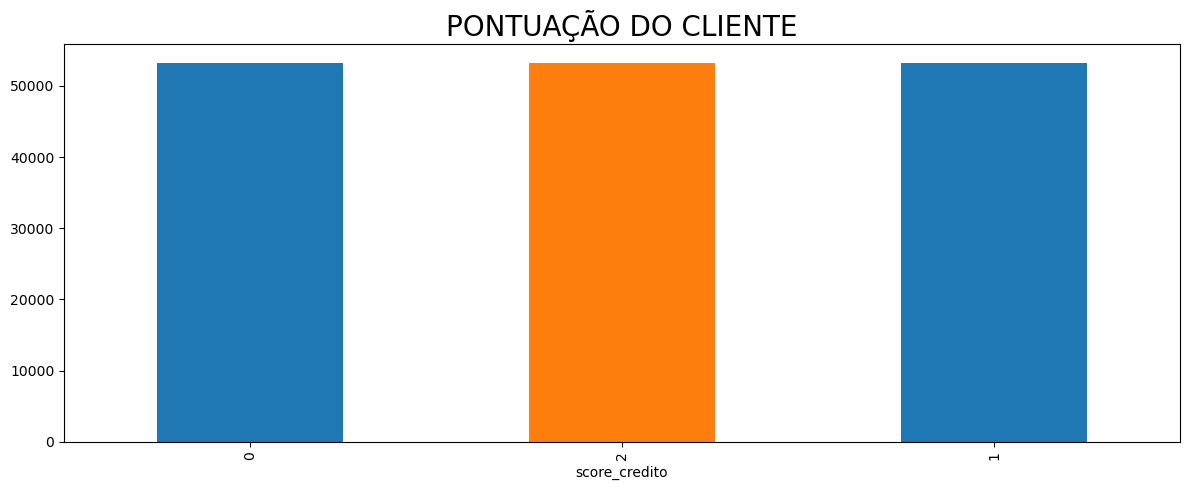

In [124]:
from imblearn.over_sampling import SMOTE

# Seed para reproduzir o mesmo resultado
seed = 100

# Cria o balanceador SMOTE
smote_bal = SMOTE(random_state=seed)
# Verifica a contagem de classes antes do balanceamento
print("Contagem de classes antes do balanceamento:")
print(y.value_counts())

# Aplica o balanceador
X_res, y_res = smote_bal.fit_resample(X, y)

# Verifica a contagem de classes após o balanceamento
print("\nContagem de classes após o balanceamento:")
print(pd.Series(y_res).value_counts())


# Visualizando o balanceamento da variável TARGET
plt.rcParams["figure.figsize"] = [12.00, 5.00]
plt.rcParams["figure.autolayout"] = True
y_res.value_counts().plot(kind='bar', title='PONTUAÇÃO DO CLIENTE',color = ['#1F77B4', '#FF7F0E']);

In [125]:
X.shape

(100000, 20)

In [126]:
X_res.shape

(159522, 20)

In [127]:
y.shape

(100000,)

In [128]:
y_res.shape

(159522,)

In [129]:
from xgboost import XGBClassifier

In [130]:
teste_size = 0.33
seed = 7

# Criando o dataset de treino e de teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X_res, y_res, test_size = teste_size, random_state = seed)


In [131]:
# Criando o modelo
modelo = XGBClassifier()

# Treinando o modelo
modelo.fit(X_treino, y_treino)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [132]:
y_pred = modelo.predict(X_teste)
previsoes = [round(value) for value in y_pred]

In [133]:
# Avaliando as previsões
accuracy = accuracy_score(y_teste, previsoes)
print("Acurácia: %.2f%%" % (accuracy * 100.0))



Acurácia: 81.46%


In [134]:
#Using confusion matrix to find the accuracy
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_teste,y_pred)

accuracy = cm.diagonal().sum()/cm.sum()

print("\n---------------------------\n")
print("Accuracy of Predictions = ",accuracy)

print("\n---------------------------\n")
print(classification_report(y_teste, y_pred))
print(cm)


---------------------------

Accuracy of Predictions =  0.8146192276276049

---------------------------

              precision    recall  f1-score   support

           0       0.81      0.91      0.86     17450
           1       0.82      0.84      0.83     17798
           2       0.81      0.69      0.75     17395

    accuracy                           0.81     52643
   macro avg       0.81      0.81      0.81     52643
weighted avg       0.81      0.81      0.81     52643

[[15802   252  1396]
 [ 1310 15006  1482]
 [ 2300  3019 12076]]


In [136]:
# Importe as bibliotecas necessárias
from xgboost import XGBClassifier
import numpy as np

# Defina as variáveis com os valores desejados
idade = 3
profissao = 1
salario_anual = 0
num_contas = 0
num_cartoes = 416500
juros_emprestimo = 2
num_emprestimos = 652
dias_atraso = 3
num_pagamentos_atrasados = 0
mix_credito = 1
divida_total = 124
taxa_uso_credito = 652
investimento_mensal = 0
comportamento_pagamento = 1
saldo_final_mes = 652
emprestimo_carro = 3
emprestimo_casa = 0
emprestimo_pessoal = 0
emprestimo_credito = 1
emprestimo_estudantil = 1

# Crie o parâmetro com os valores
parametro = np.array([[idade, profissao, salario_anual, num_contas, num_cartoes, juros_emprestimo,
              num_emprestimos, dias_atraso, num_pagamentos_atrasados, mix_credito,
              divida_total, taxa_uso_credito, investimento_mensal, comportamento_pagamento,
              saldo_final_mes, emprestimo_carro, emprestimo_casa, emprestimo_pessoal,
              emprestimo_credito, emprestimo_estudantil]])

# Faça a previsão
fazendo_previsao = modelo.predict(parametro)
probabilidade = modelo.predict_proba(parametro)

# Verifique a previsão e imprima a mensagem apropriada
if fazendo_previsao == 0:
    print('A POTUAÇÃO DO CLIENTE SERÁ OURO!')
    print('A PROBABILIDADE DO CLIENTE SER OURO É DE:', probabilidade)
elif fazendo_previsao == 1:
    print('A POTUAÇÃO DO CLIENTE SERÁ POBRE!')
    print('A PROBABILIDADE DO CLIENTE SER POBRE É DE:', probabilidade)
else:
    print('A POTUAÇÃO DO CLIENTE SERÁ PADRÃO!')
    print('A PROBABILIDADE DO CLIENTE SER PADRÃO É DE:', probabilidade)


A POTUAÇÃO DO CLIENTE SERÁ PADRÃO!
A PROBABILIDADE DO CLIENTE SER PADRÃO É DE: [[0.01937053 0.01556887 0.9650606 ]]


In [137]:
#Comando de Salvamento da Máquina Preditiva
import pickle 
pickle_out = open("maquina_preditiva_pontuação_cliente.pkl", mode = "wb") 
pickle.dump(modelo, pickle_out) 
pickle_out.close() 